# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.ensemble import (AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier)
from sklearn import metrics
from sklearn.model_selection import (StratifiedKFold,cross_val_score,RandomizedSearchCV)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,classification_report

# Load the Dataset

In [3]:
df=pd.read_csv("BankChurner.csv")

In [4]:
df.head(2)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  Churn_Risk_Score(not churn)  \
0                  0.061                     0.000093   
1                  0.105                     0.000057   

   Churn_Risk_Score_(churn)  
0                   0.99991  
1                   0.99994  

[2 rows x 23 columns]

In [5]:
df['Attrition_Flag'].unique

<bound method Series.unique of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>

# Columns Descripition

In [6]:
# Finding the number of rows and columns
df.shape

(10127, 23)

In [7]:
df=df.drop(columns=['Churn_Risk_Score(not churn)','Churn_Risk_Score_(churn)'])

# Understanding the data

In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# Check for duplicated records
df.duplicated().sum()

np.int64(0)

In [10]:
# 5-point summary
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [11]:
print('Unique values of categorical attributes')
print('`'*100)
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('-'*50)

Unique values of categorical attributes
````````````````````````````````````````````````````````````````````````````````````````````````````
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------------------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64
--------------------------------------------------
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------------------------------------------------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------------------------------------------------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
------------------------

# Data Preprocessing

In [12]:
# Dropping 'CLIENTNUM' attribute
df.drop('CLIENTNUM', axis=1, inplace=True)
df.shape

(10127, 20)

In [13]:
# Replacing 'Existing Customer' & 'Attrited Customer' entries with 0 & 1 respectively
education_mapping = {'Existing Customer':1,'Attrited Customer':0}
df['Attrition_Flag'] = df['Attrition_Flag'].map(education_mapping)
df.head(2)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               1            45      M                3     High School   
1               1            49      F                5        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105

# Exploratory data analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

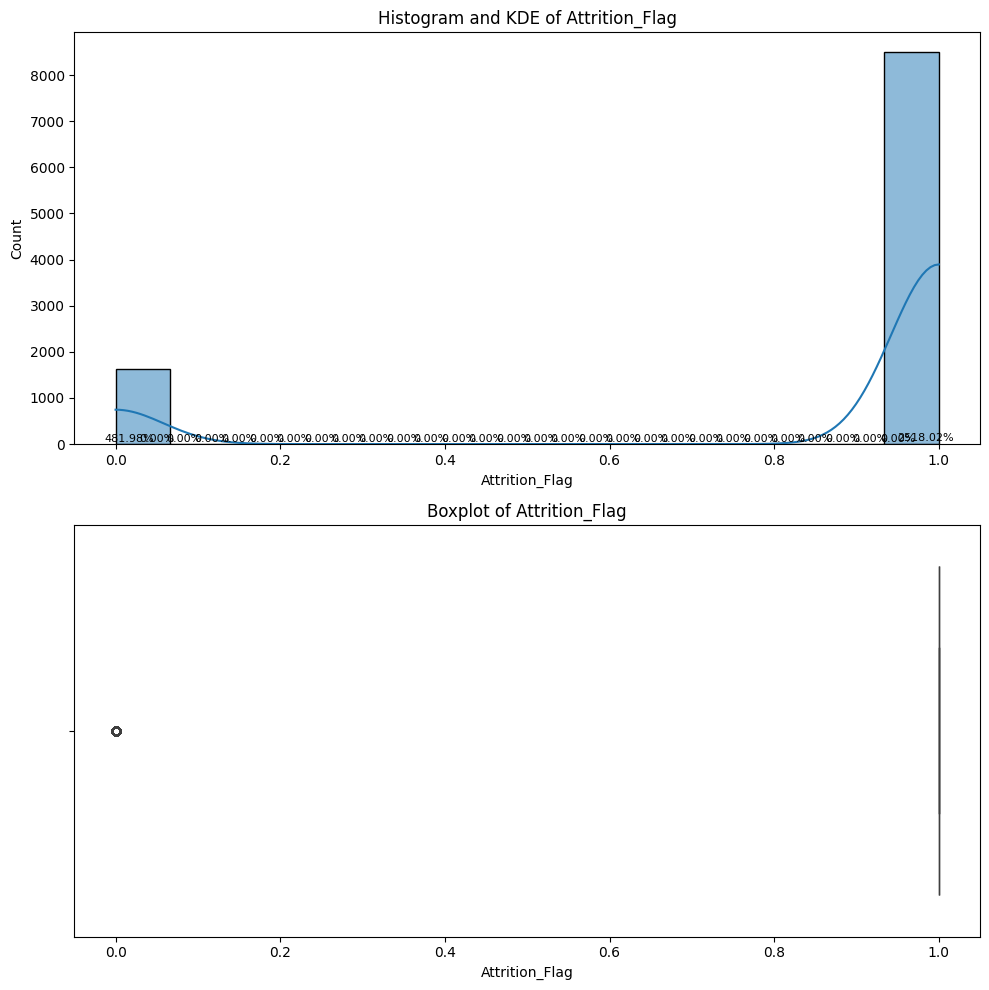

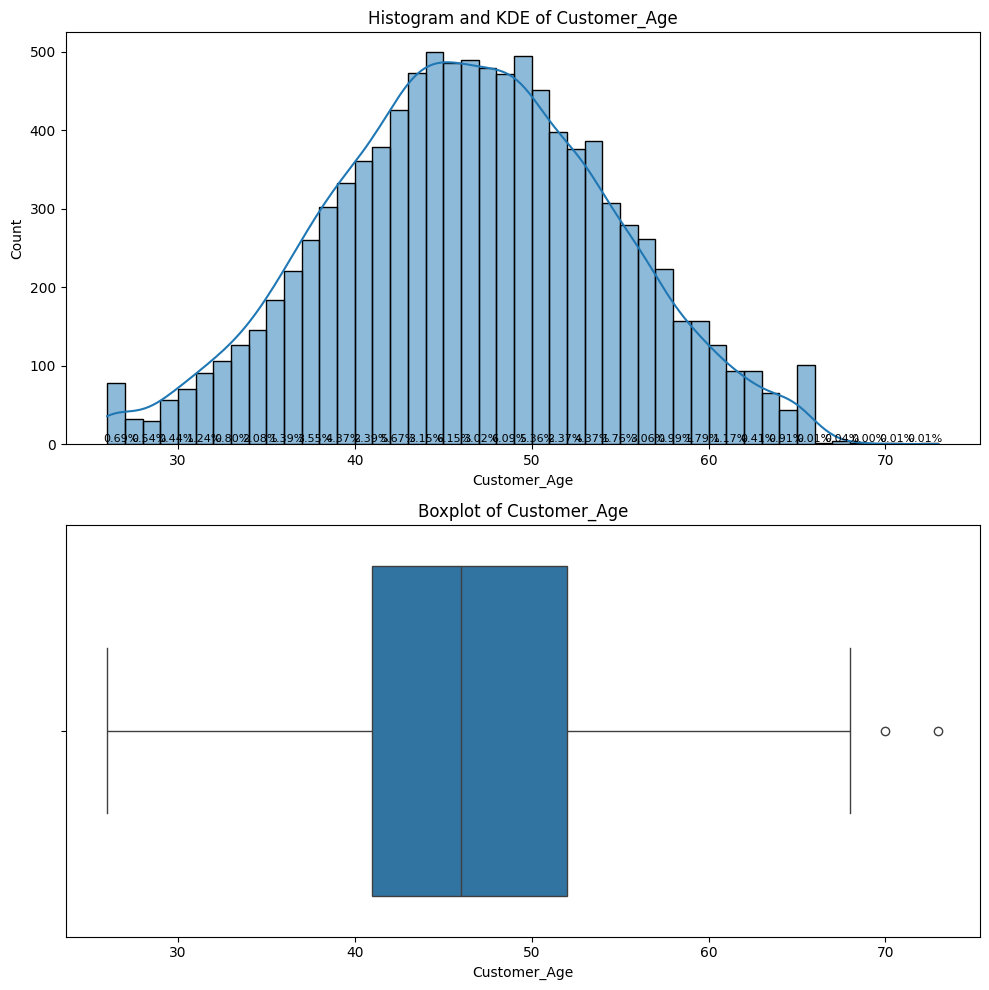

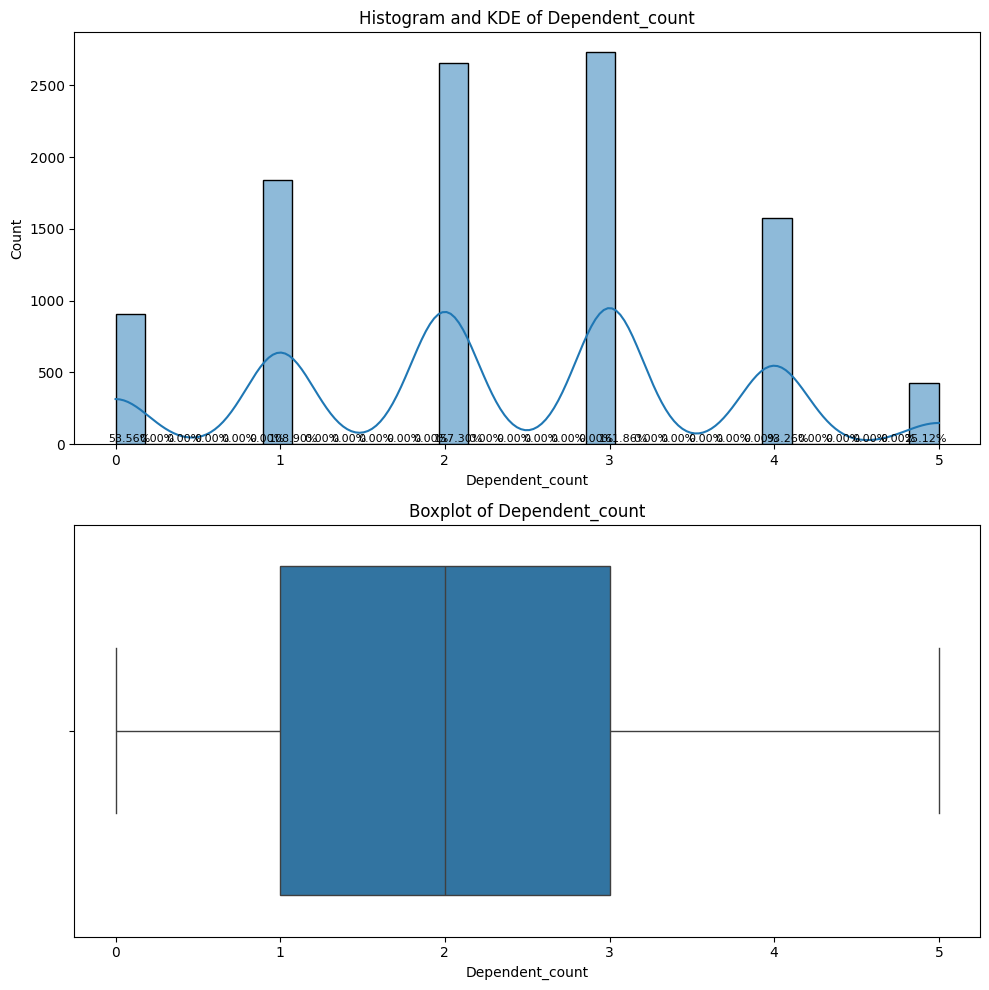

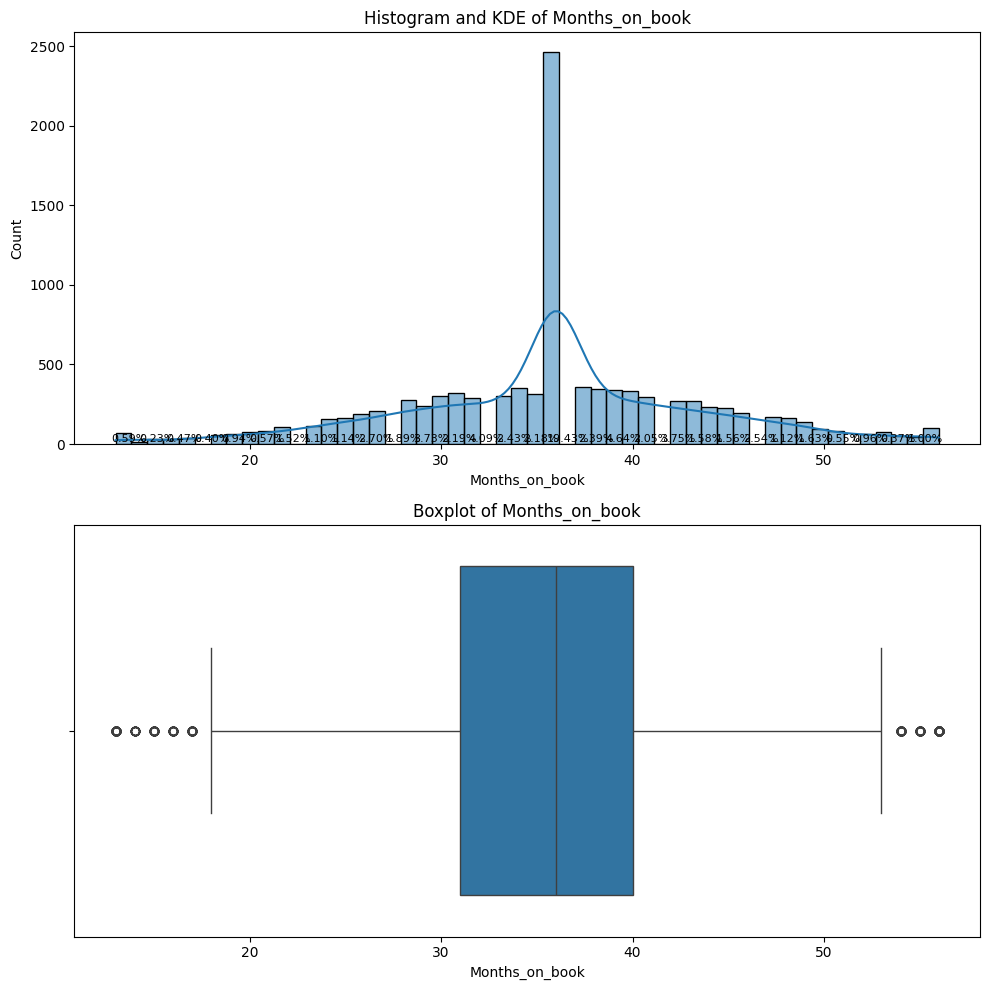

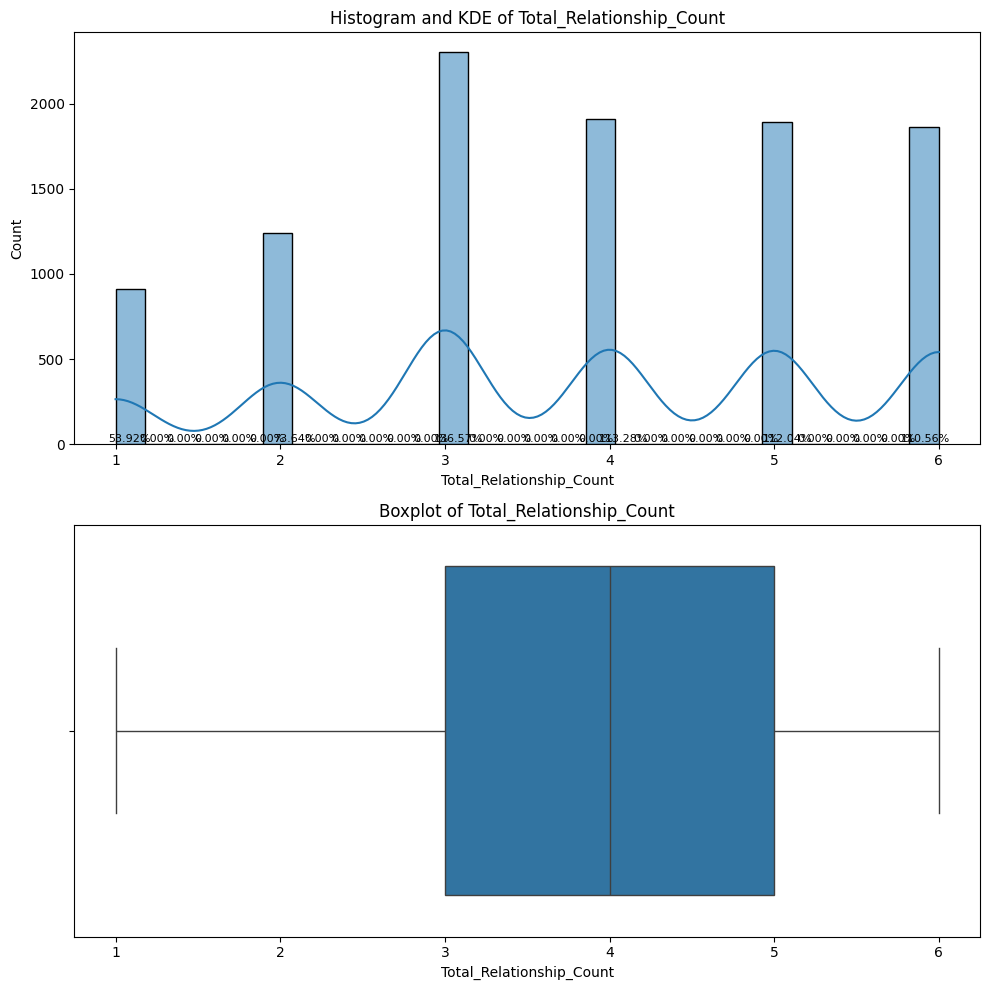

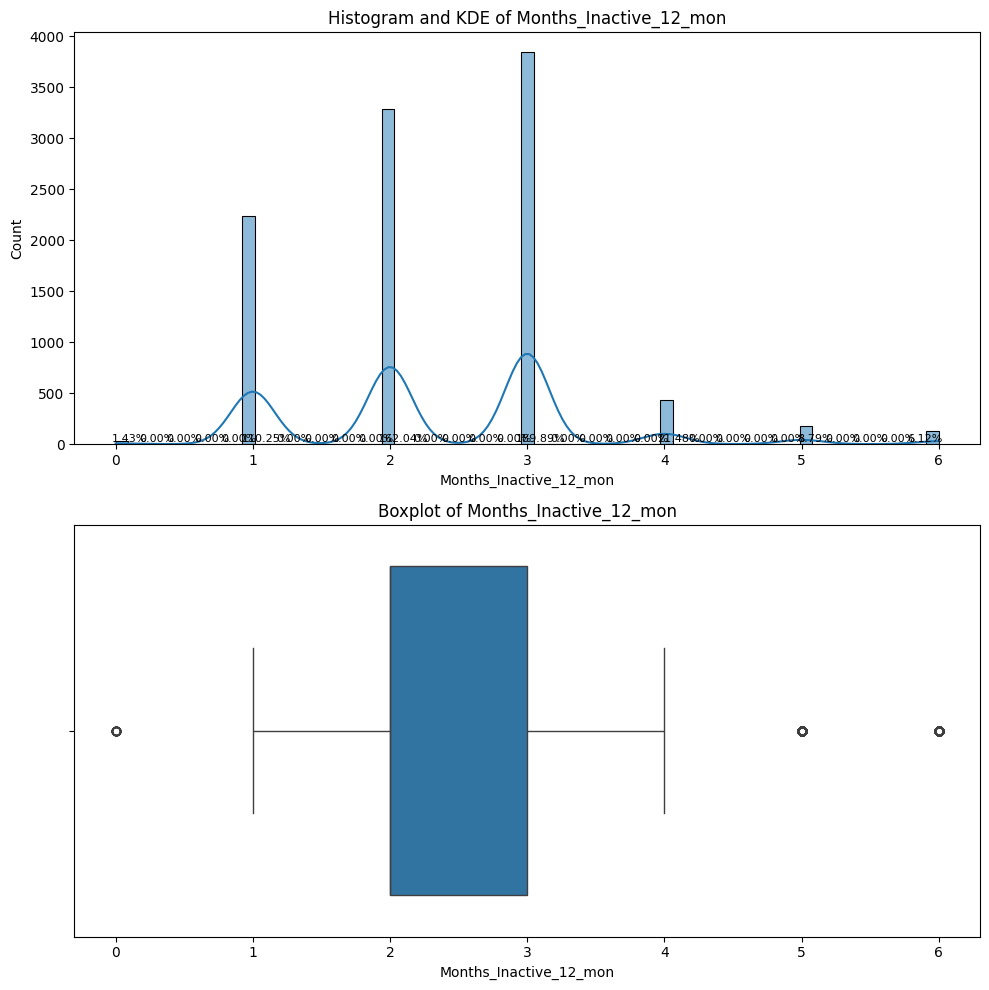

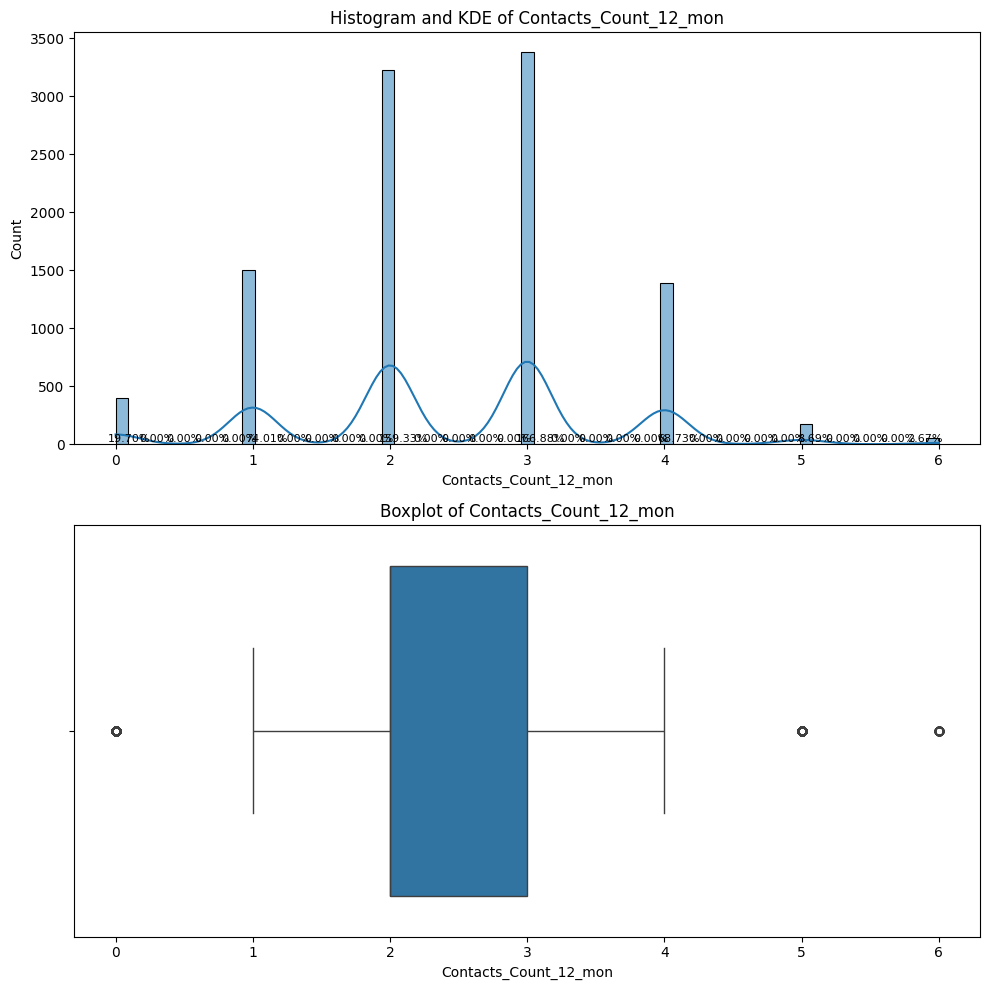

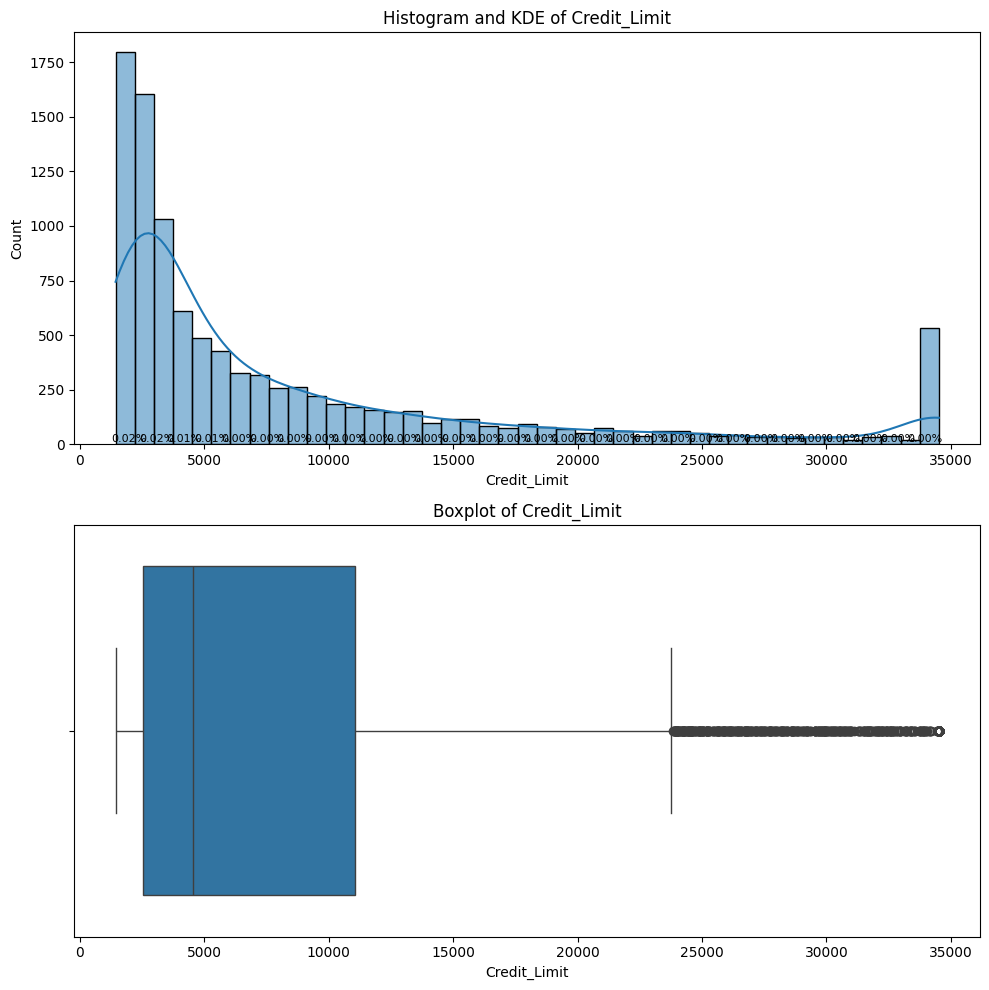

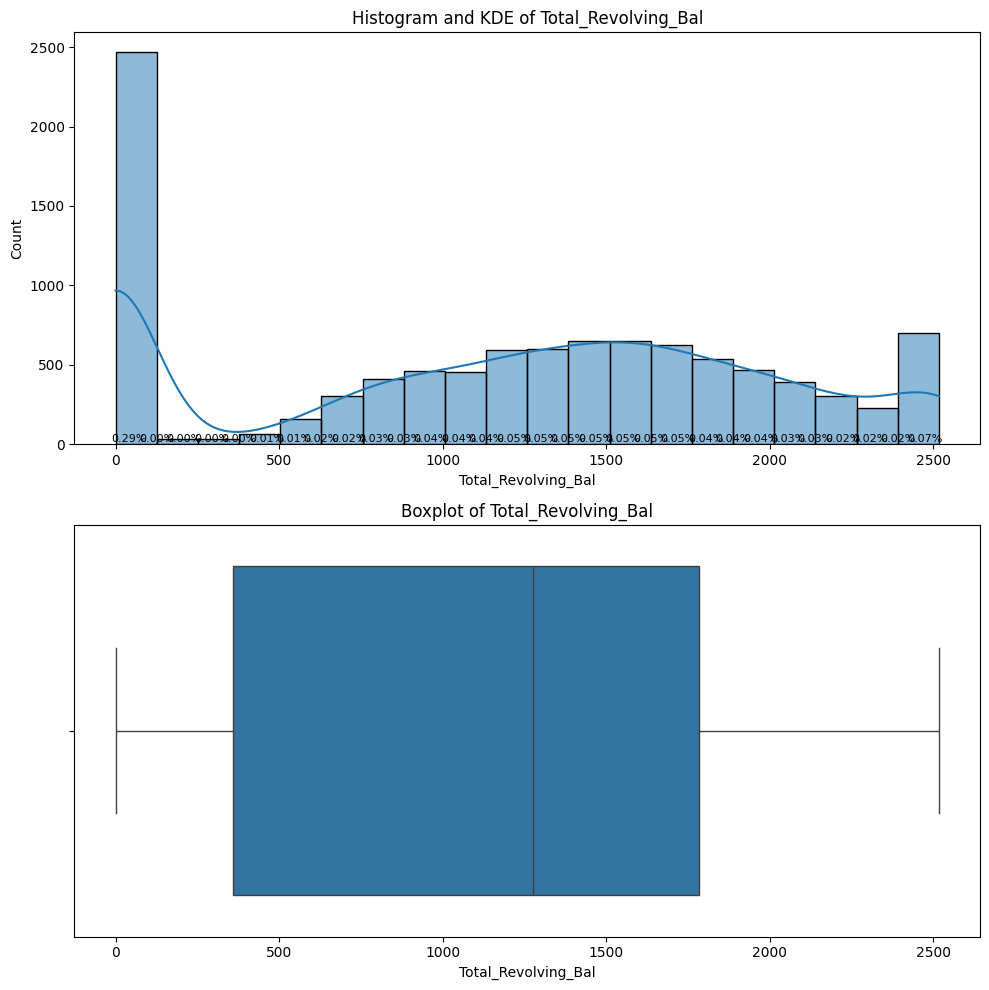

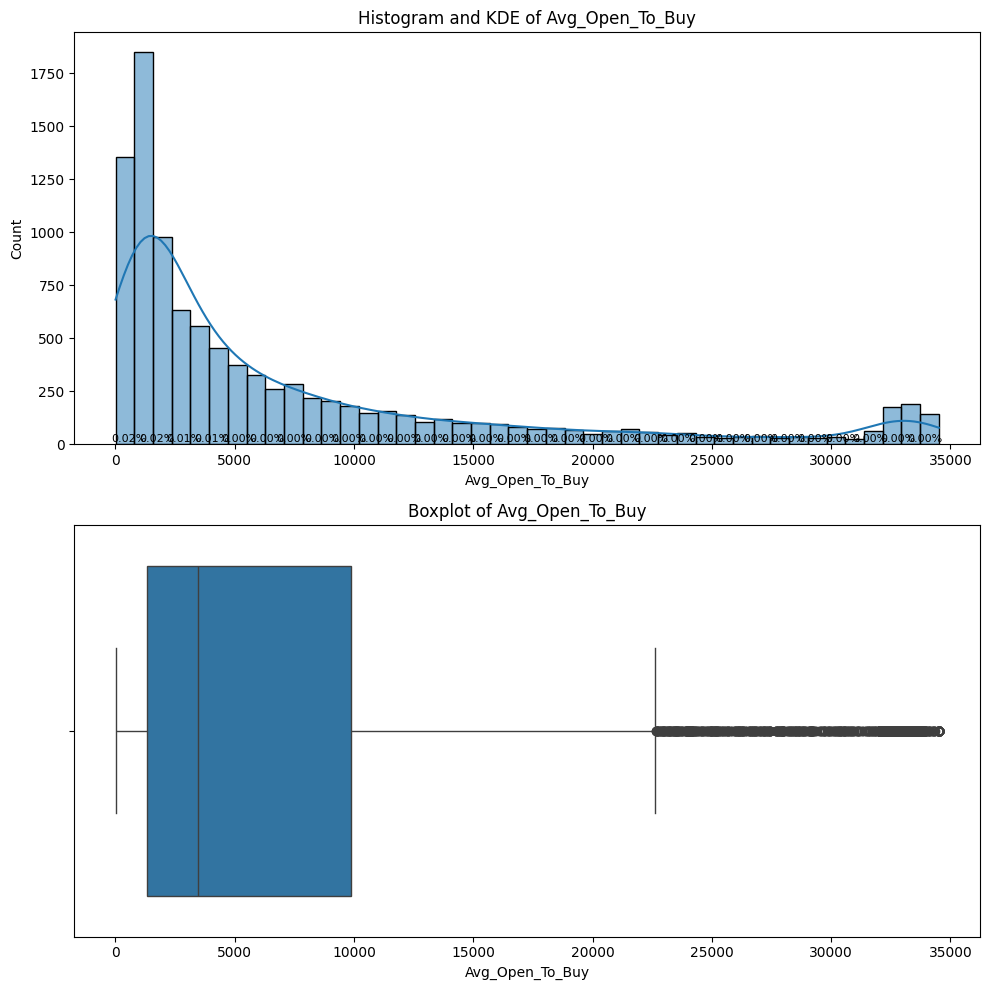

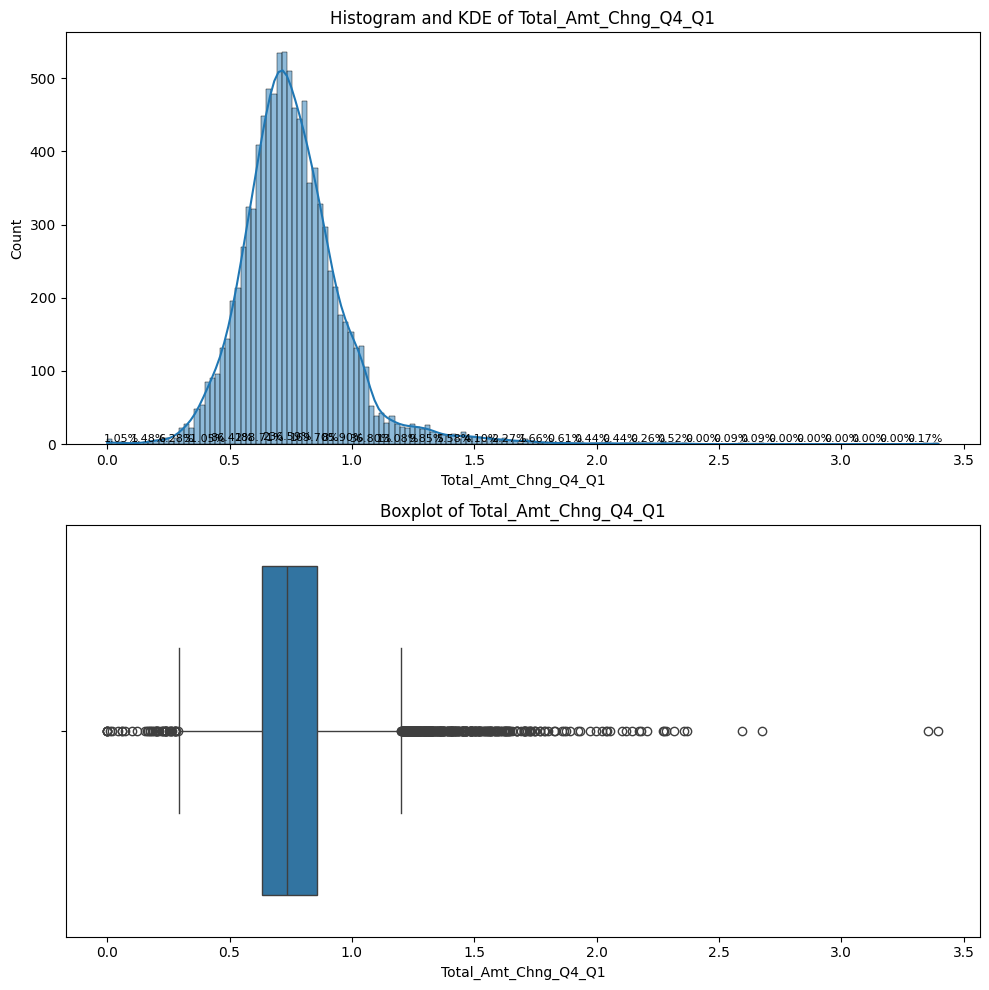

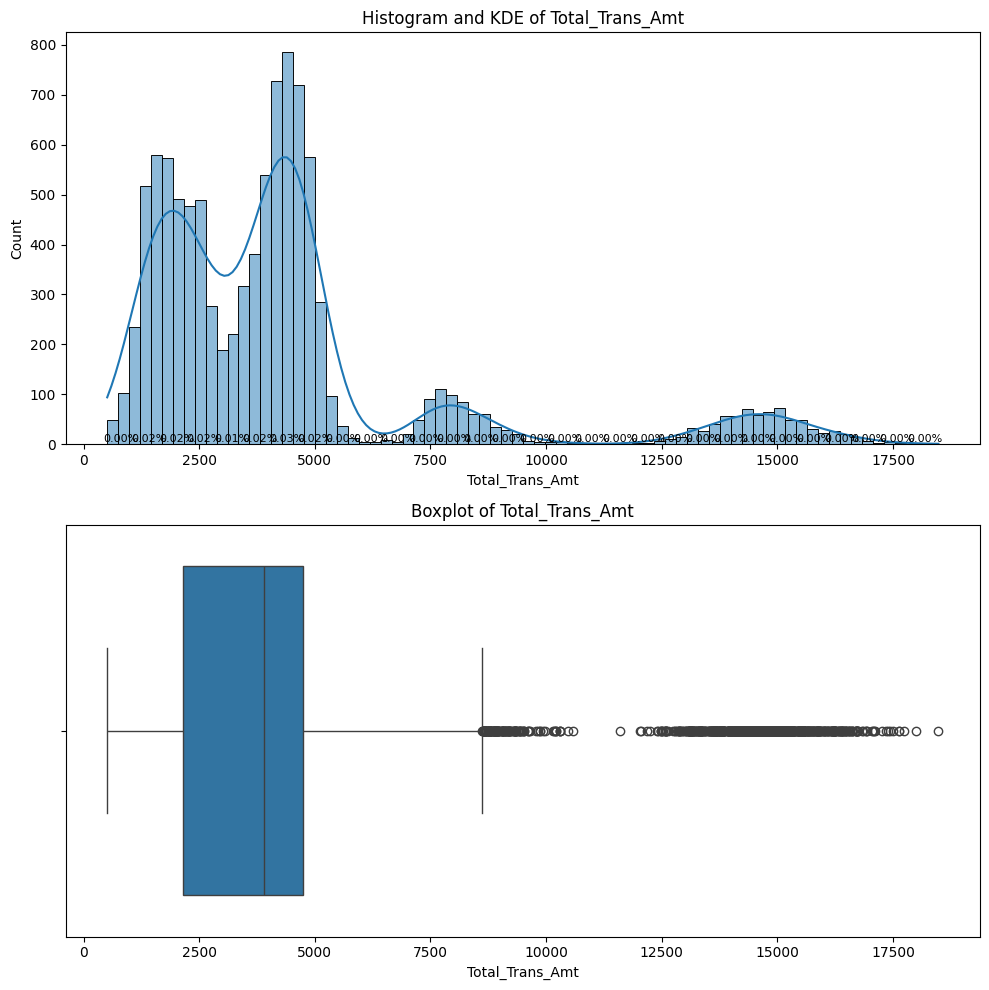

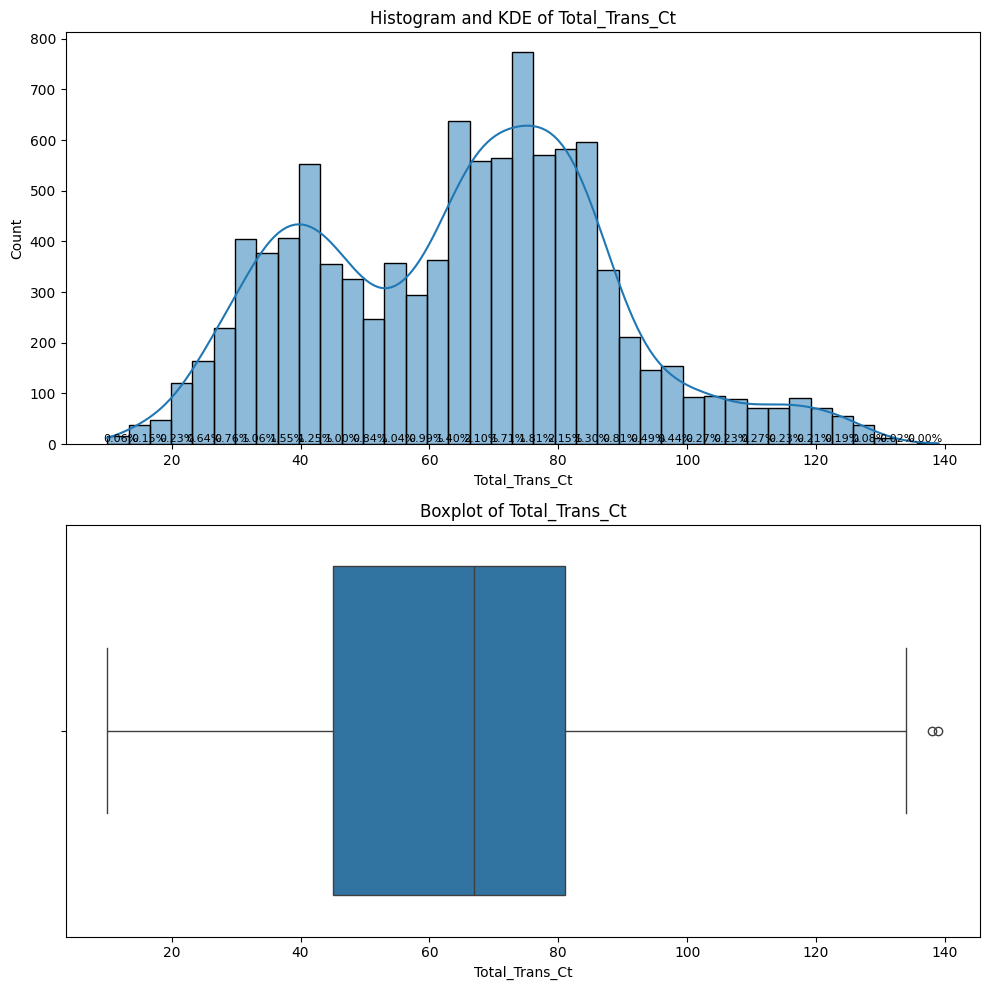

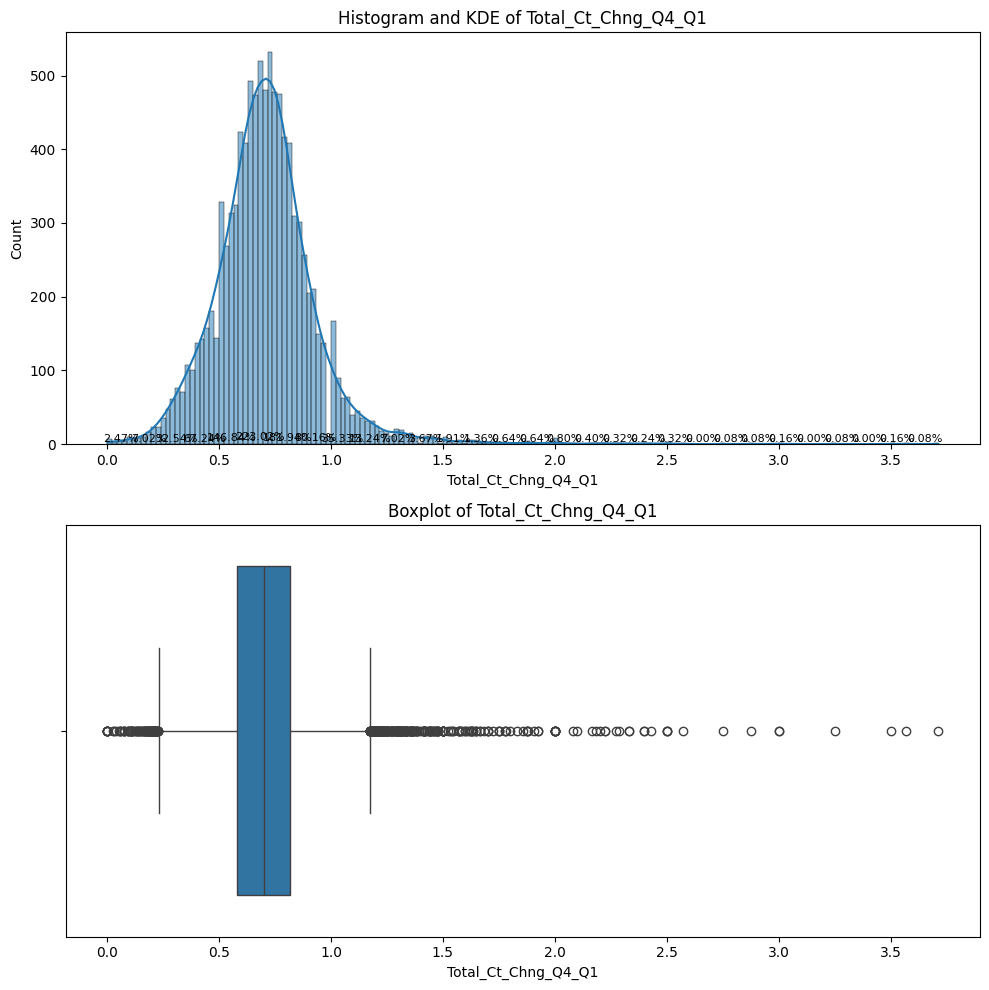

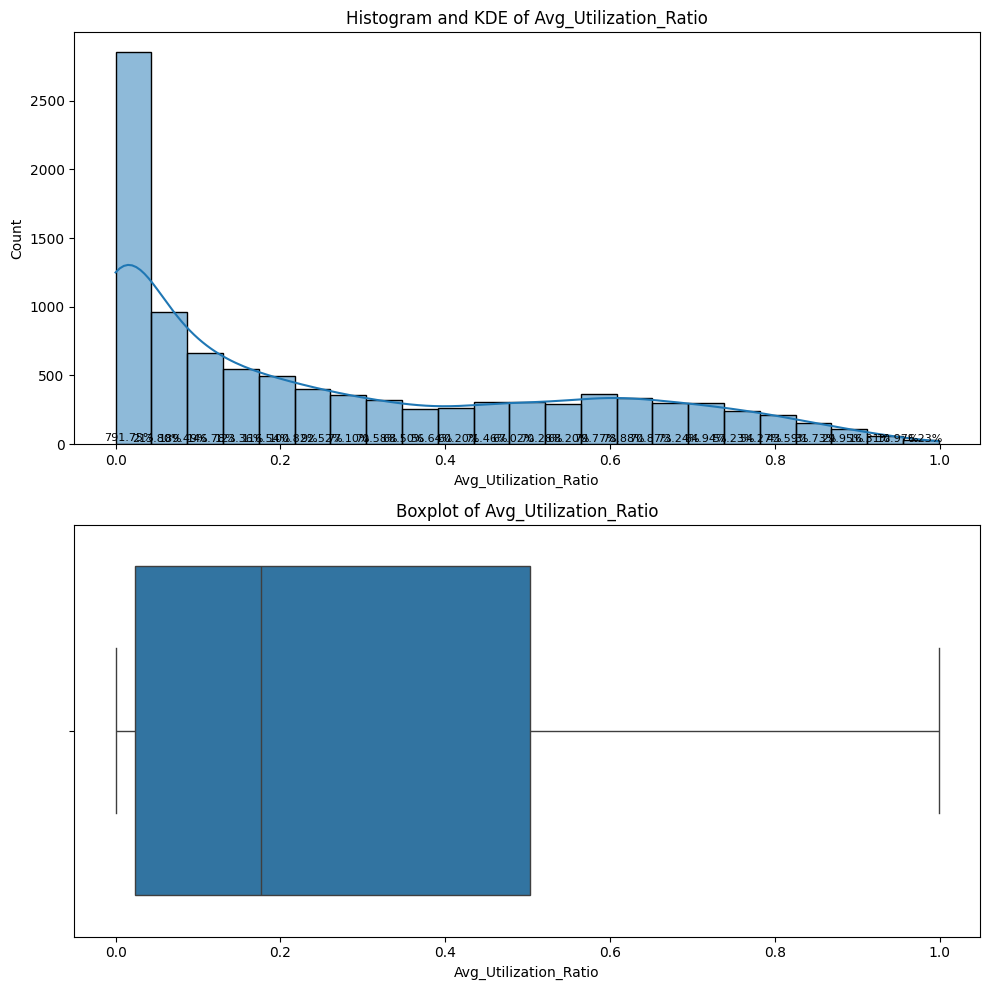

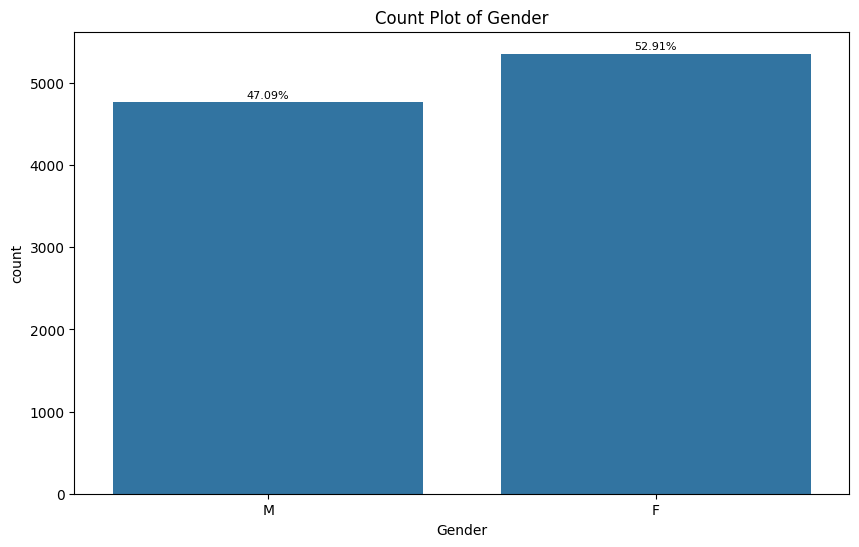

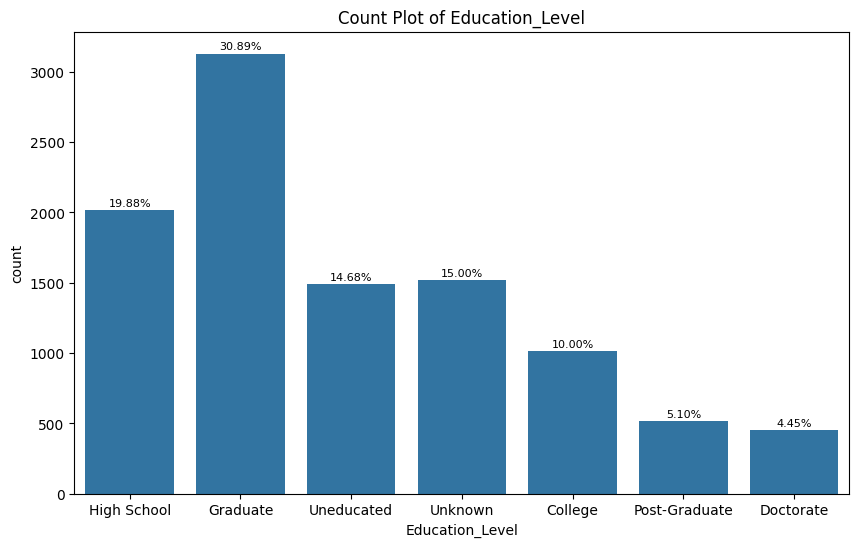

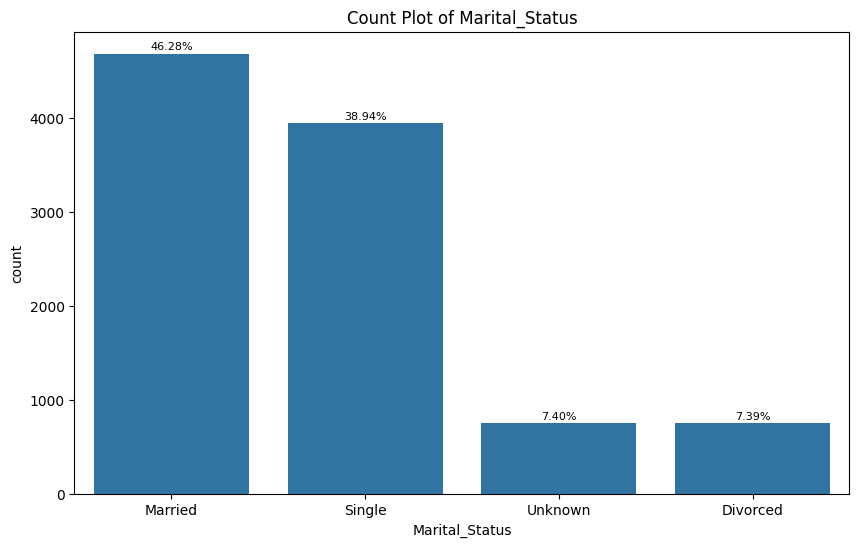

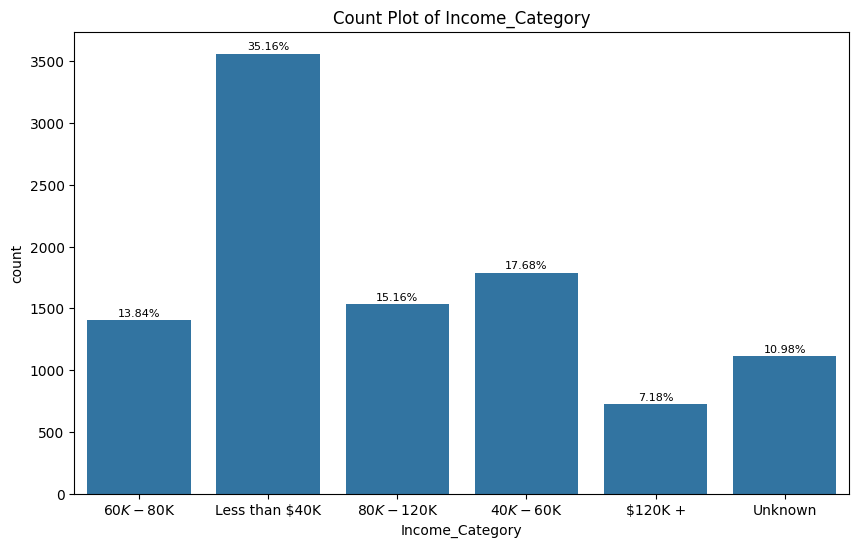

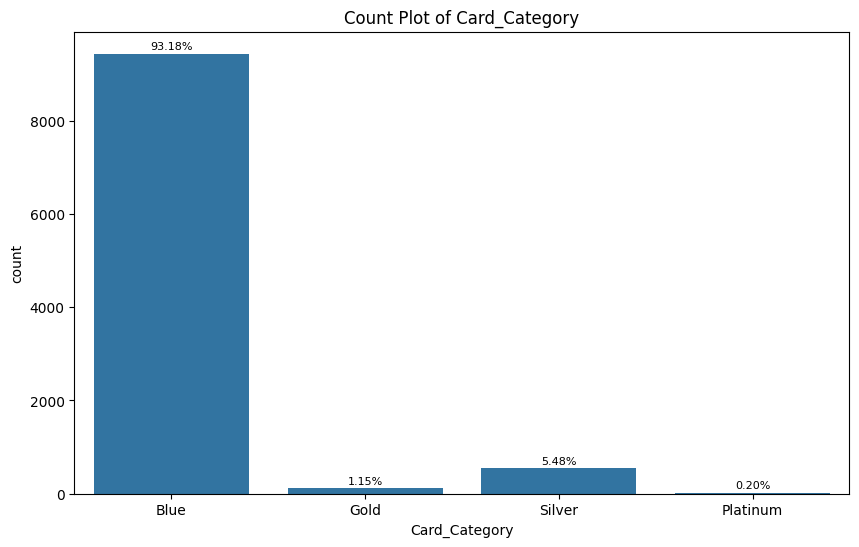

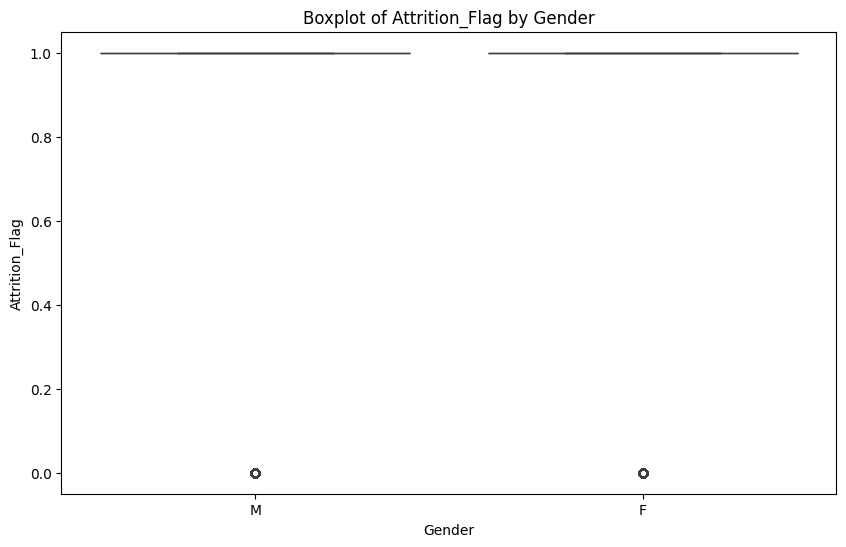

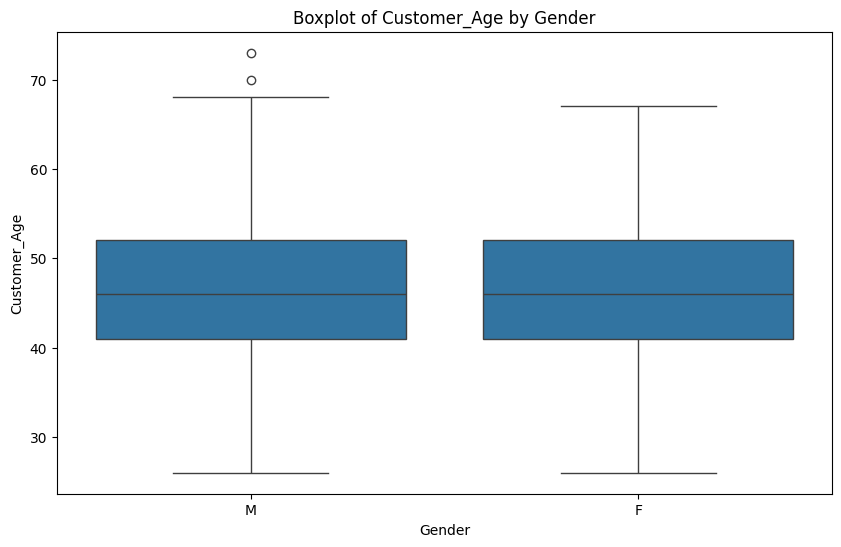

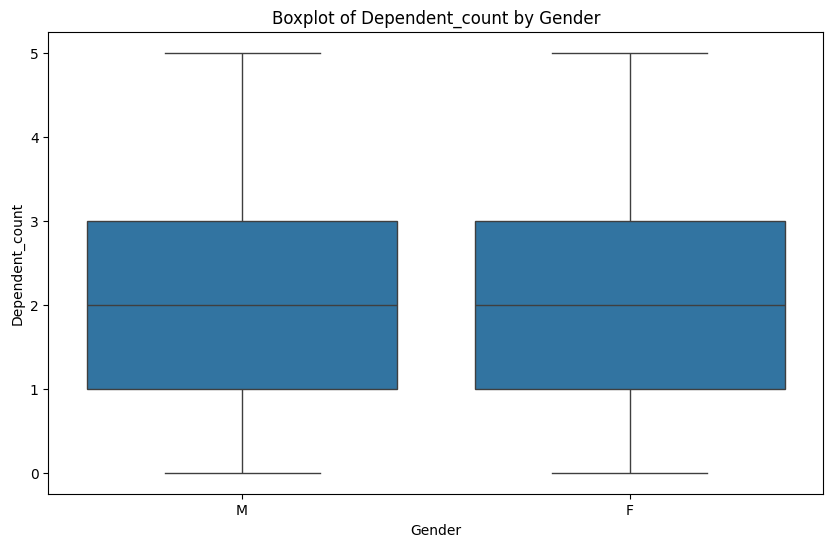

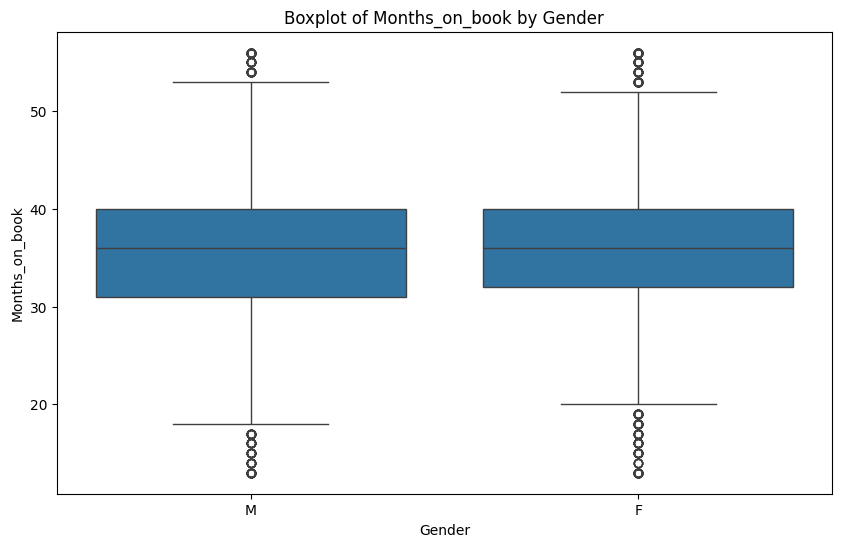

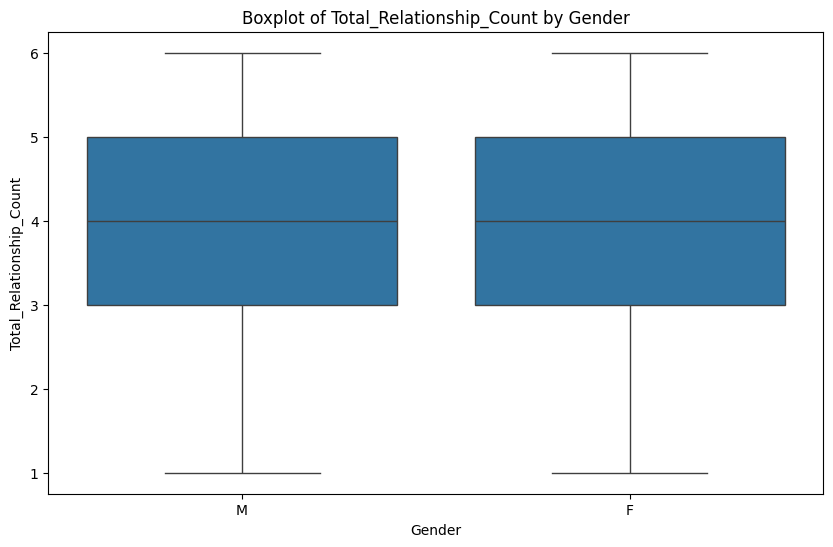

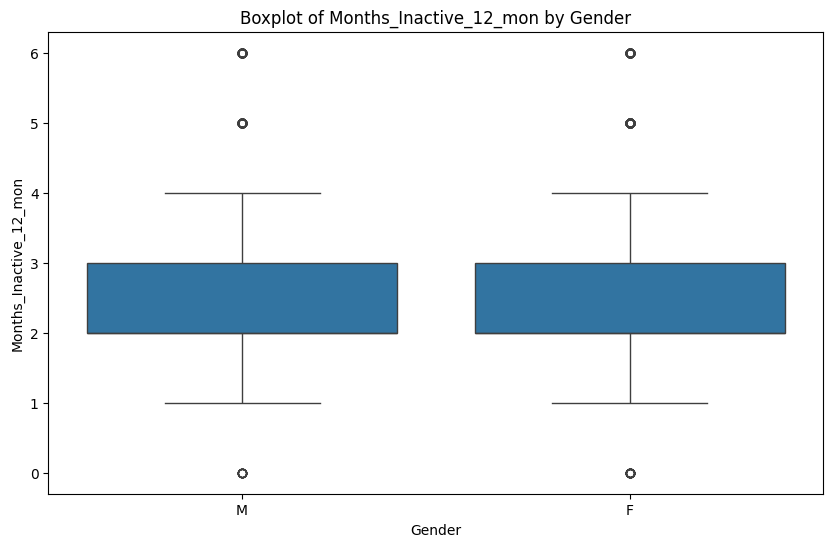

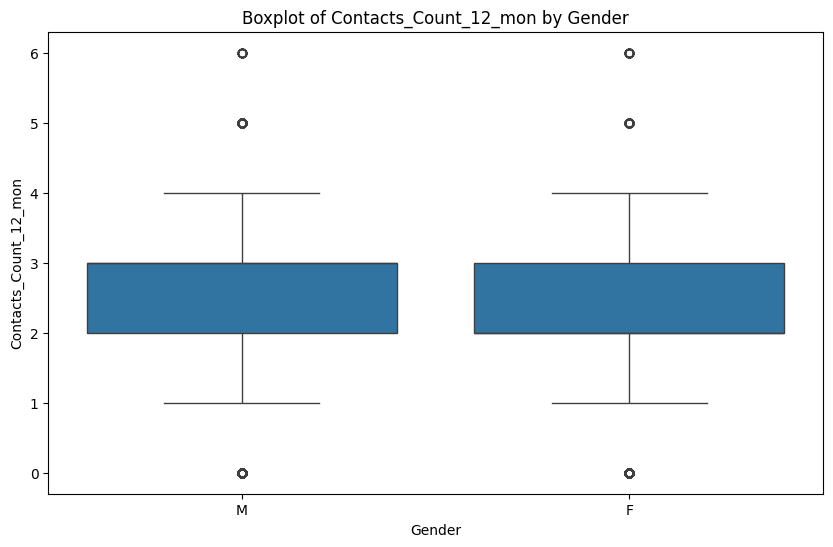

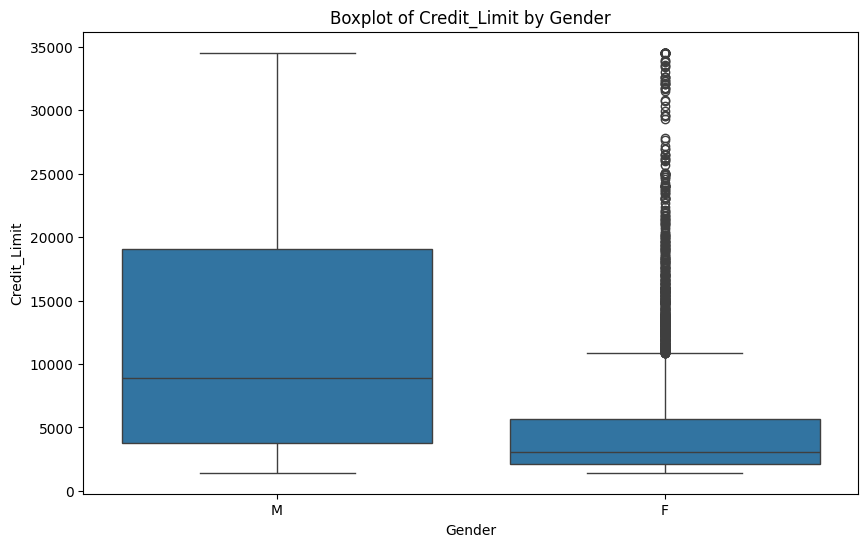

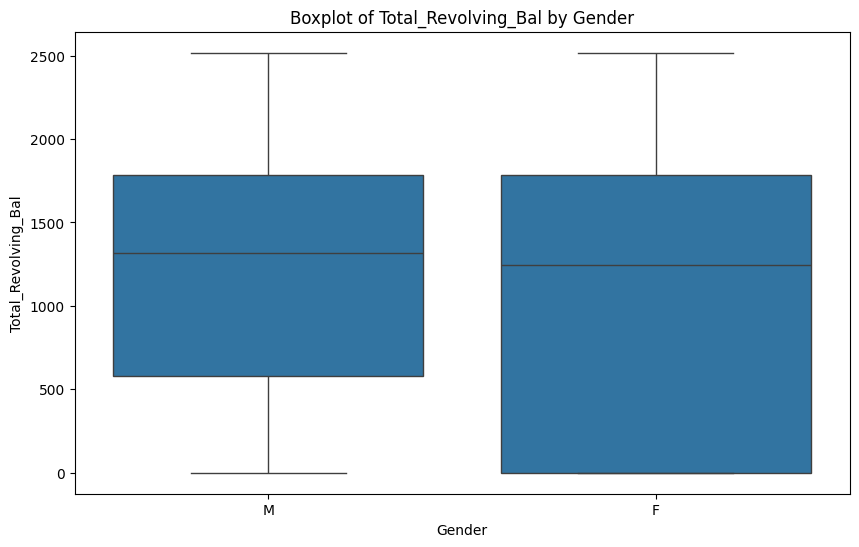

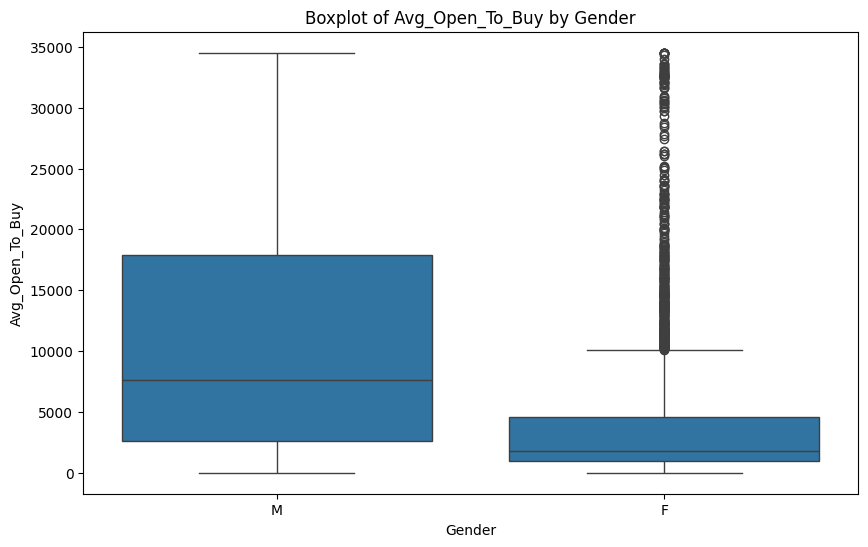

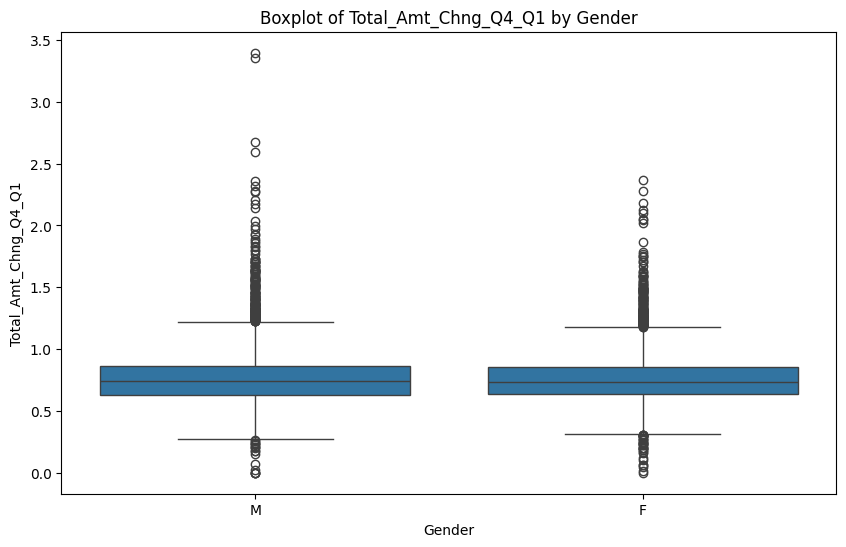

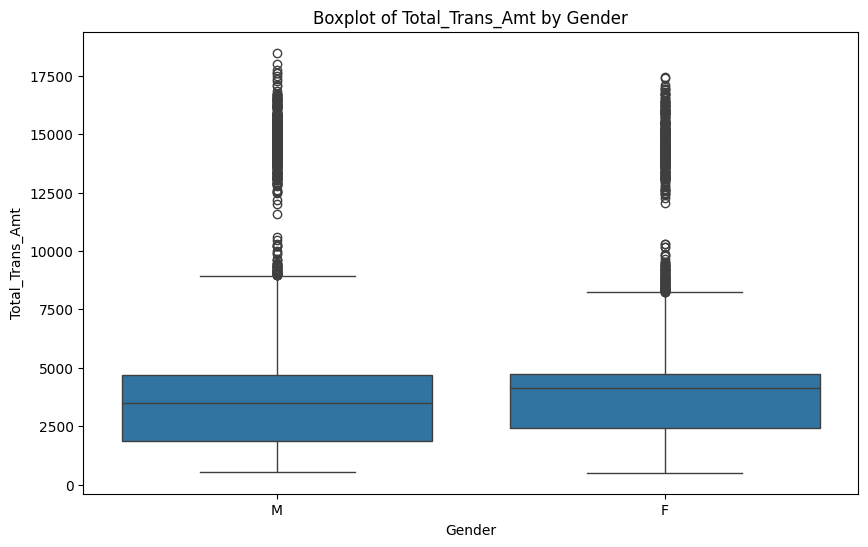

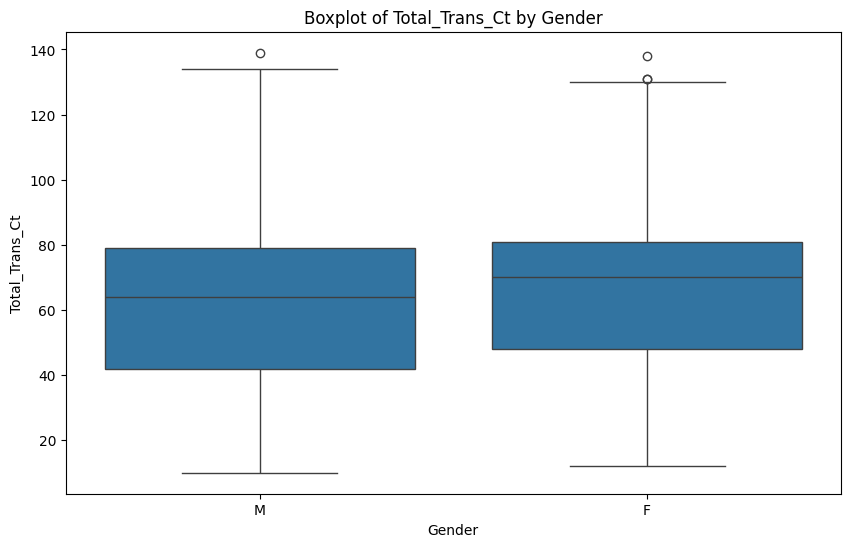

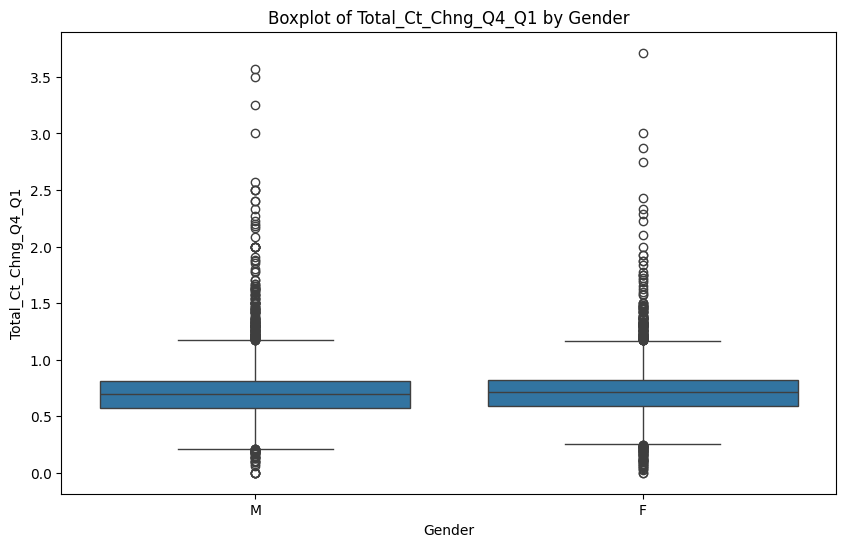

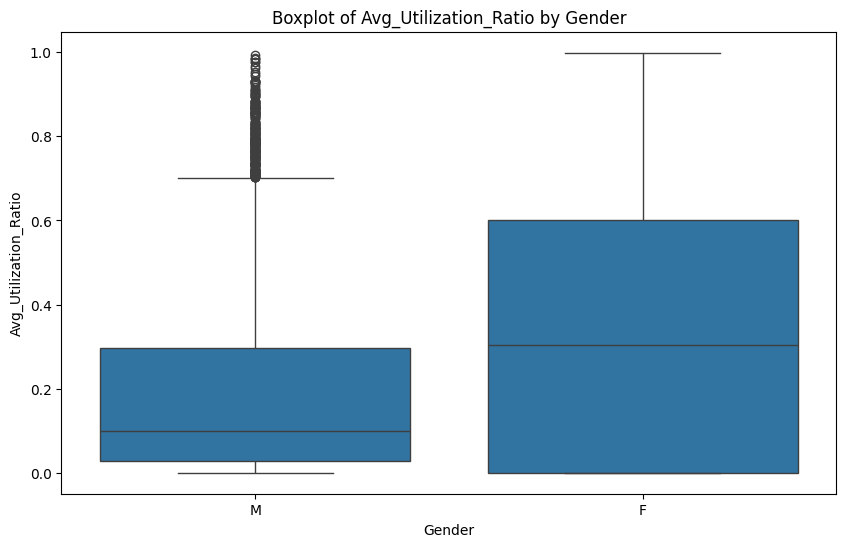

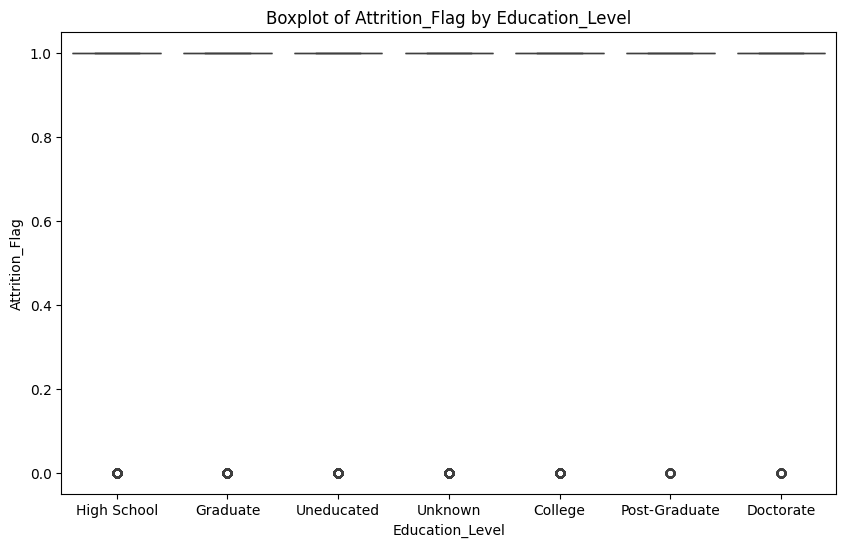

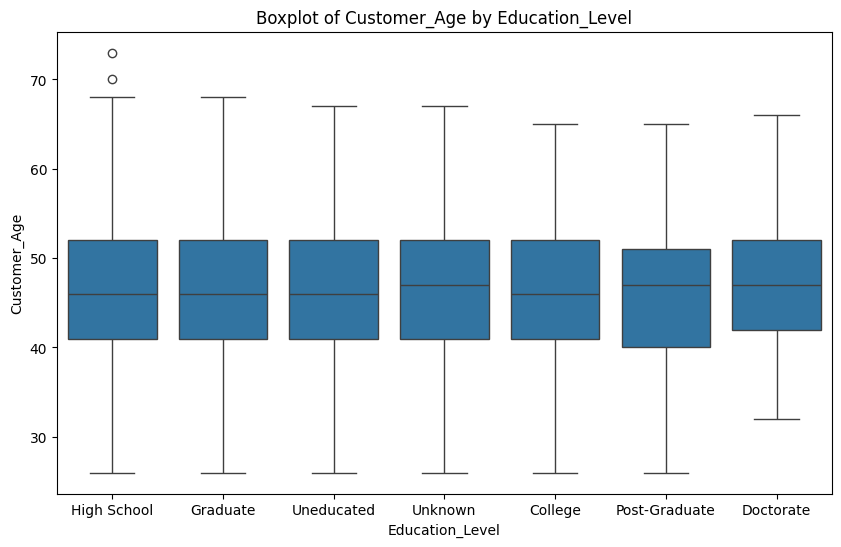

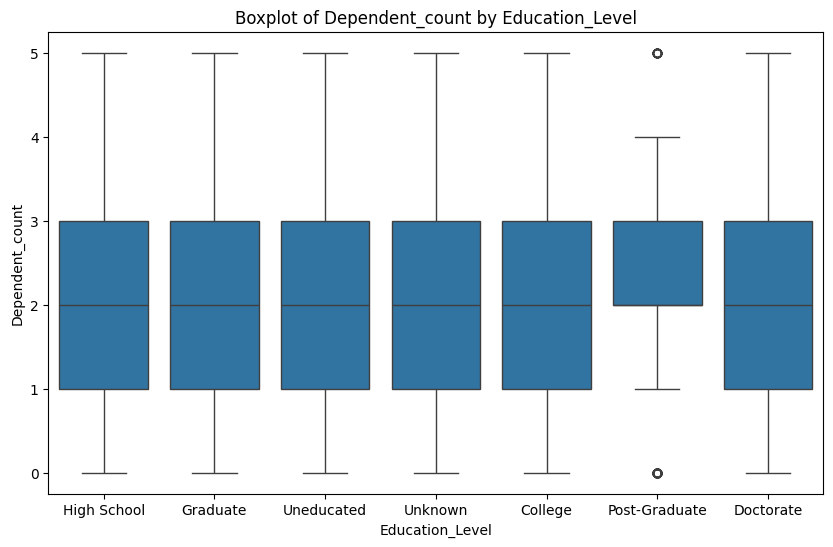

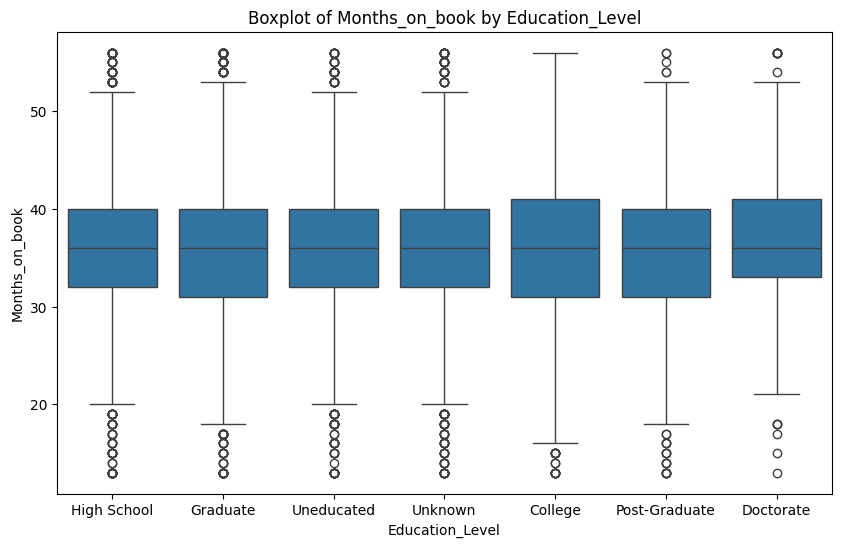

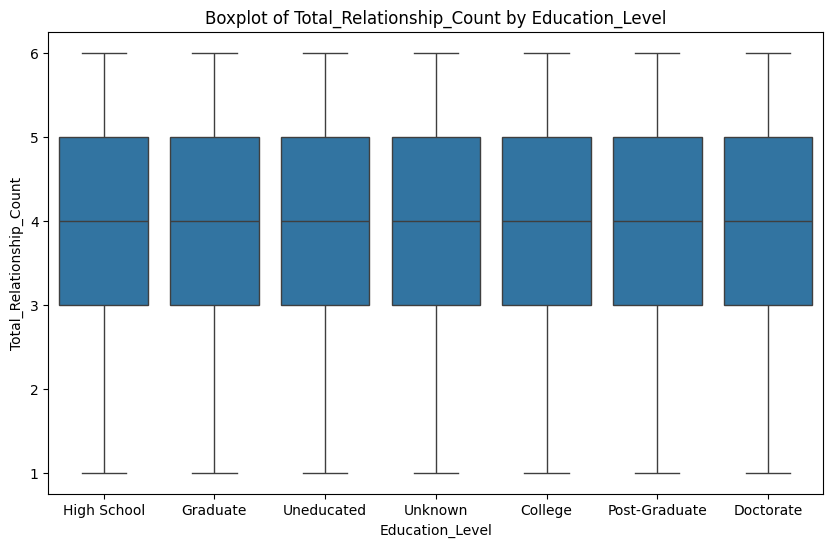

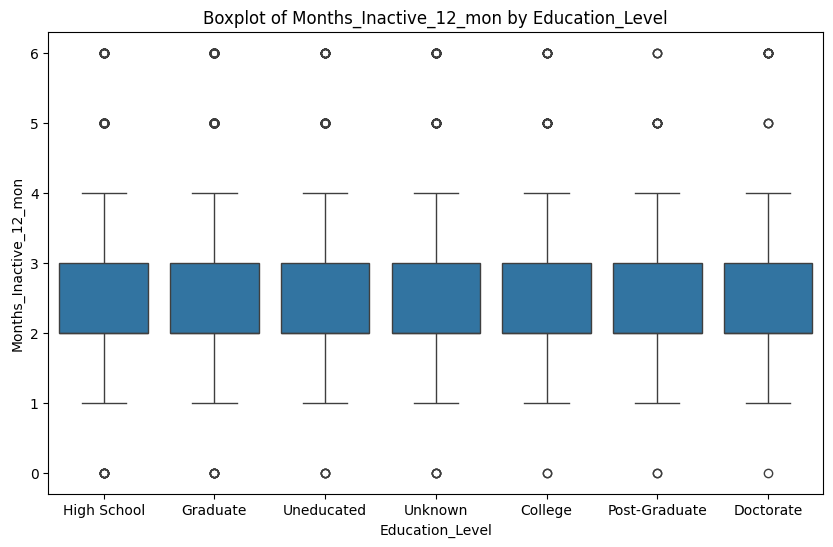

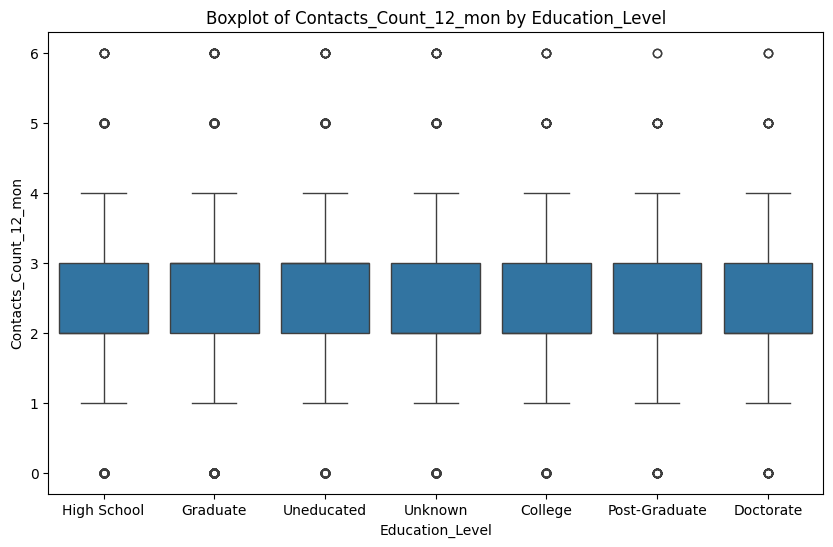

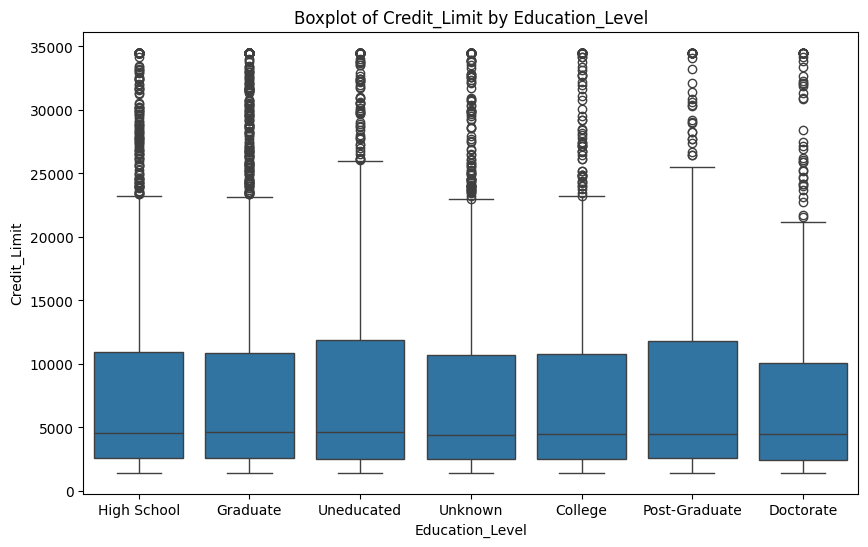

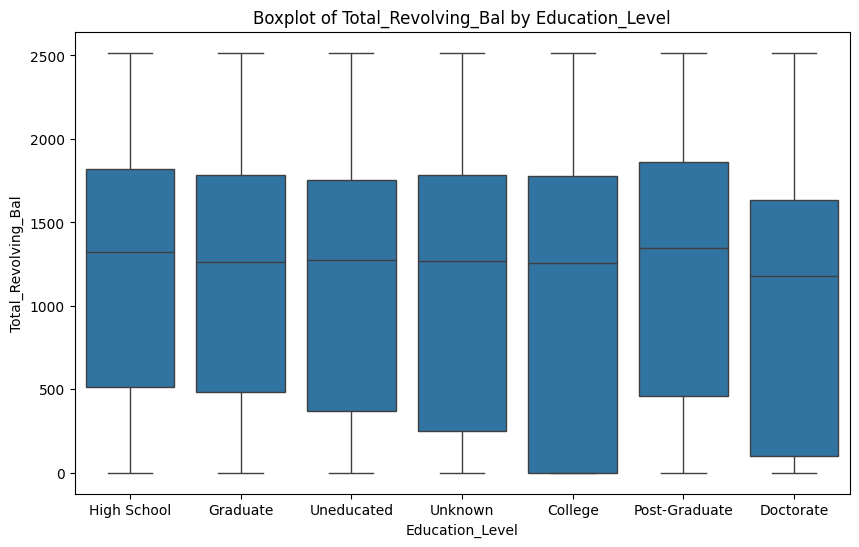

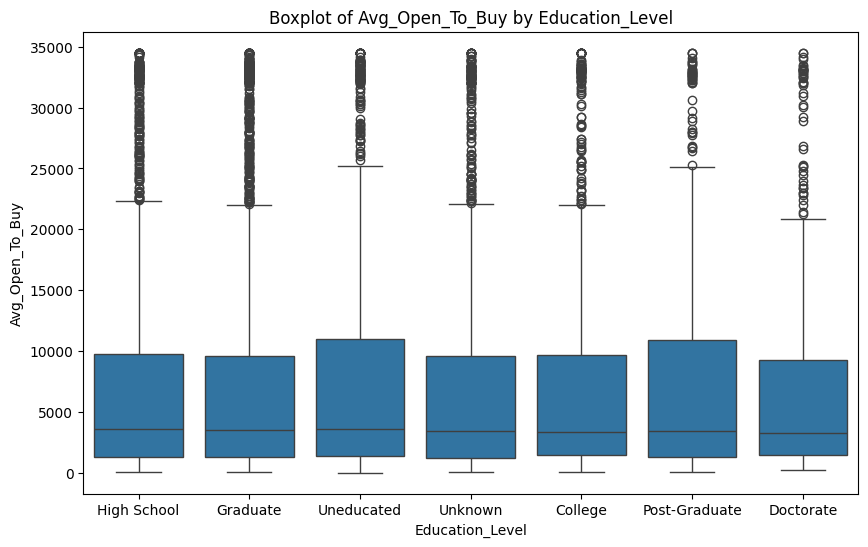

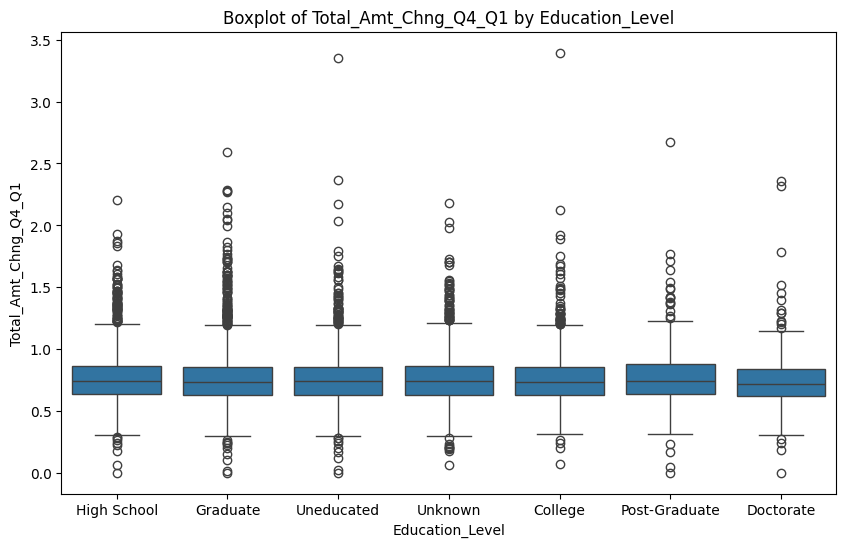

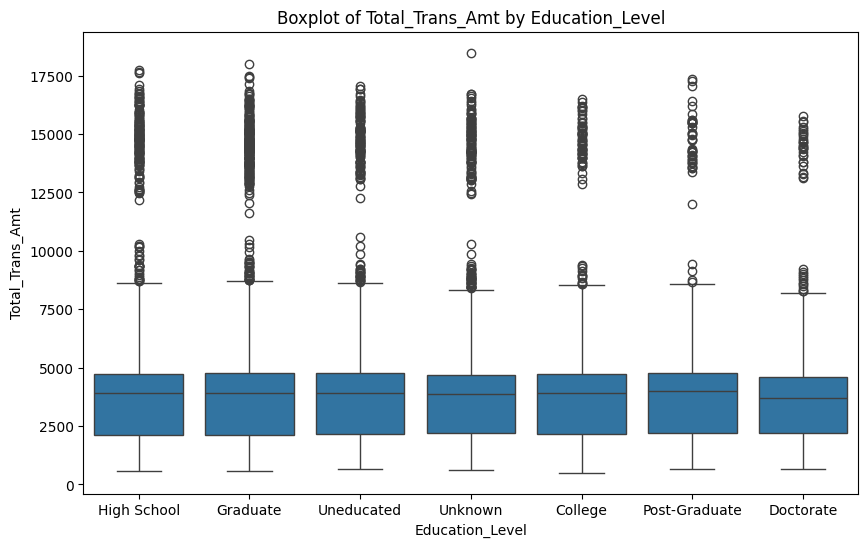

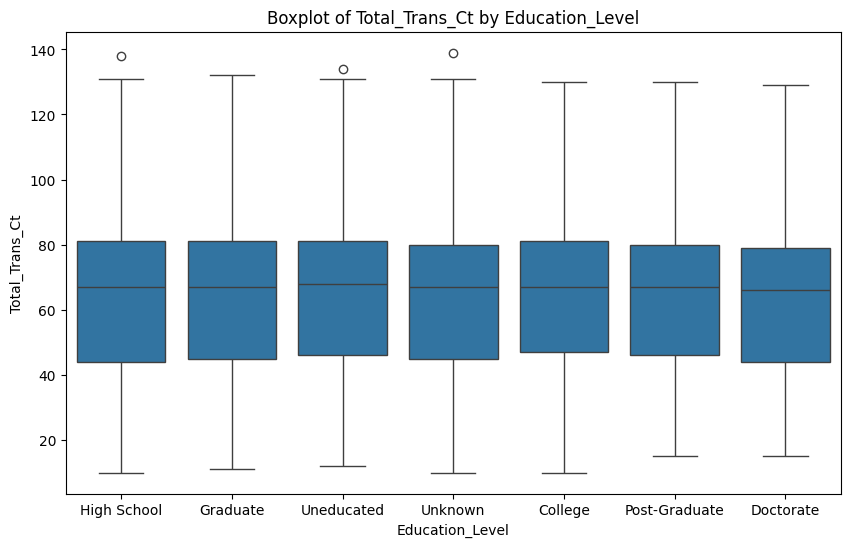

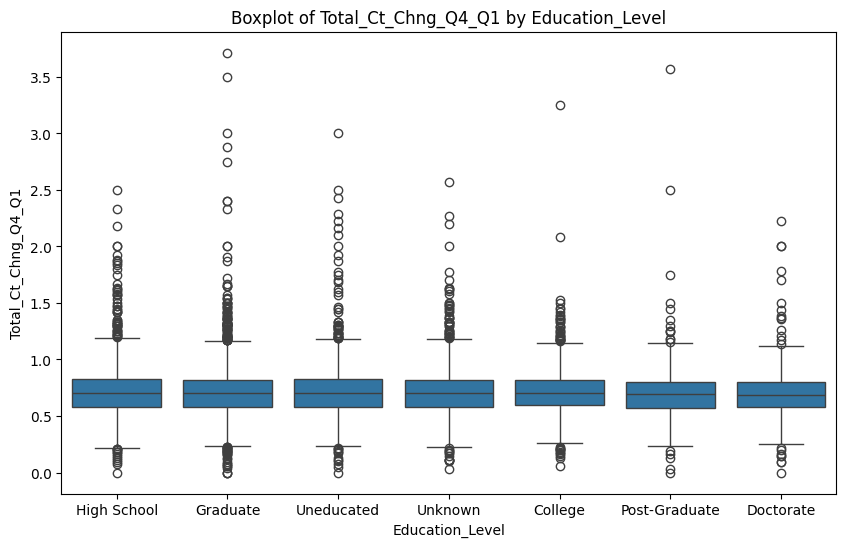

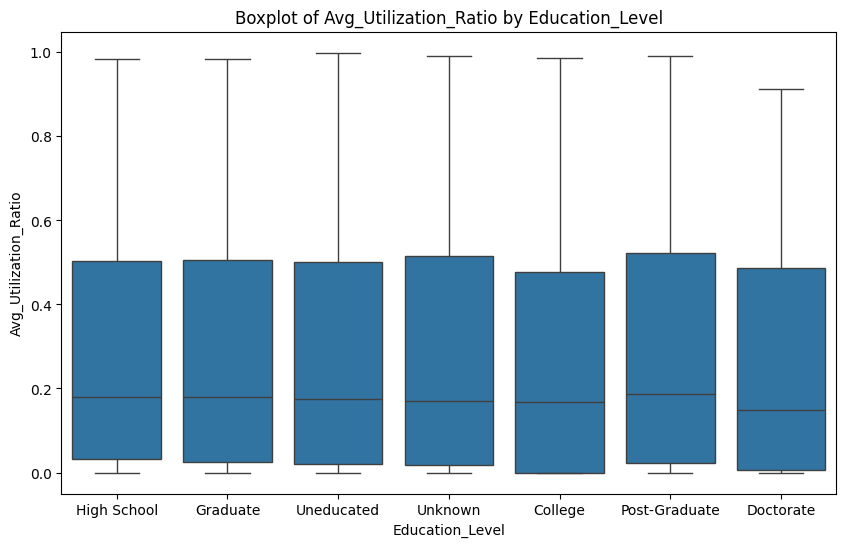

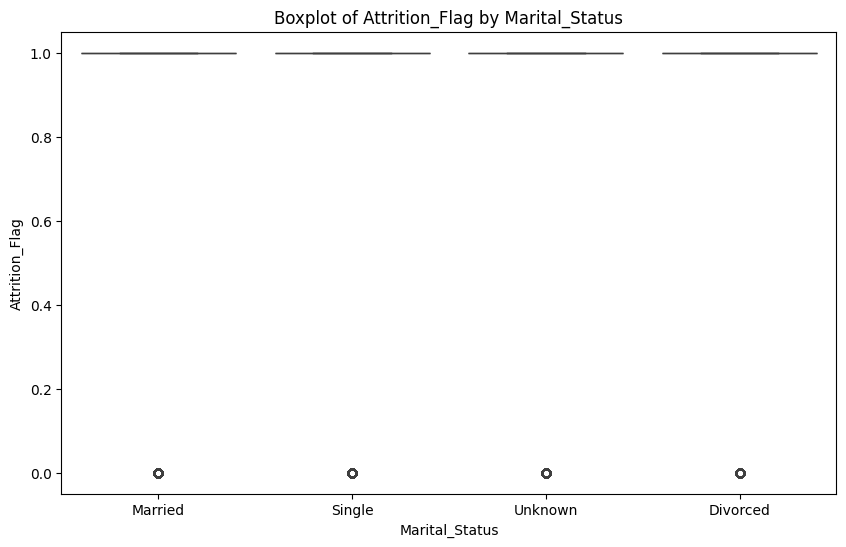

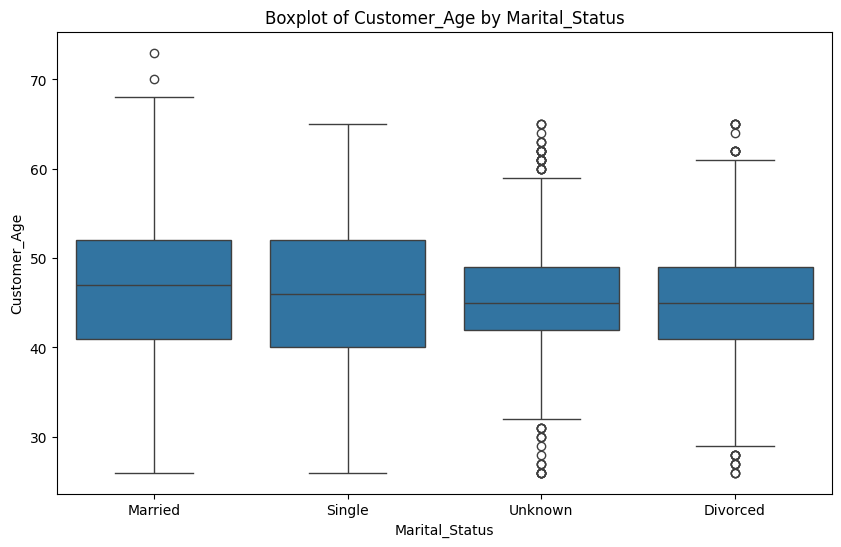

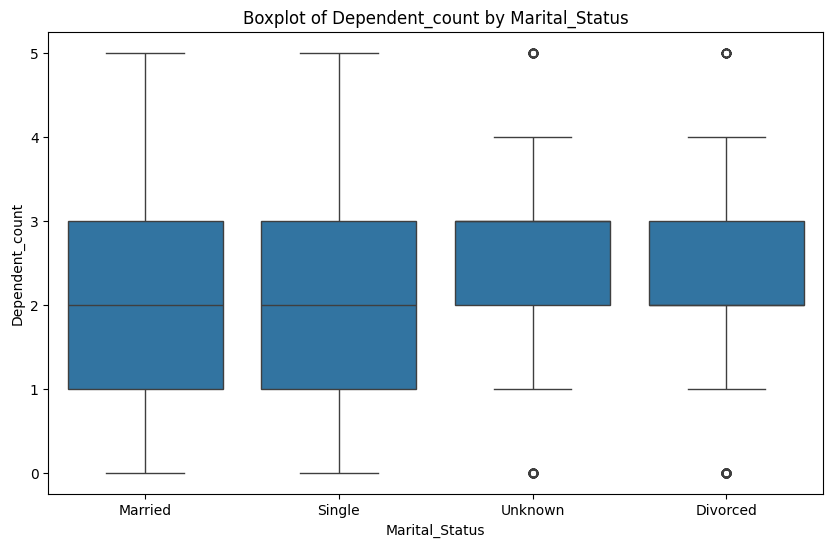

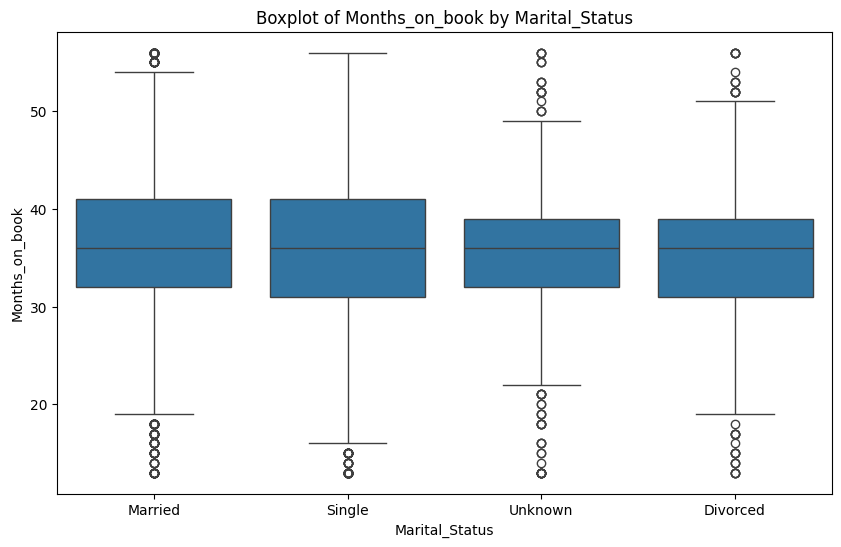

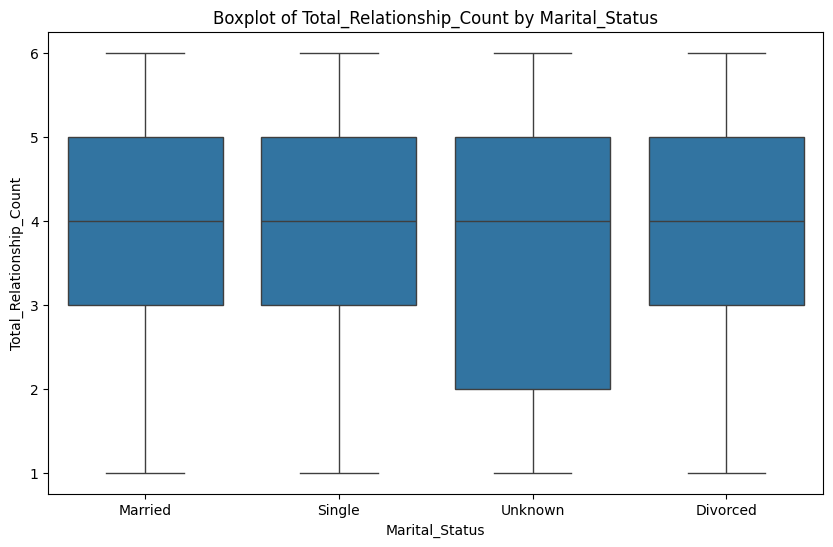

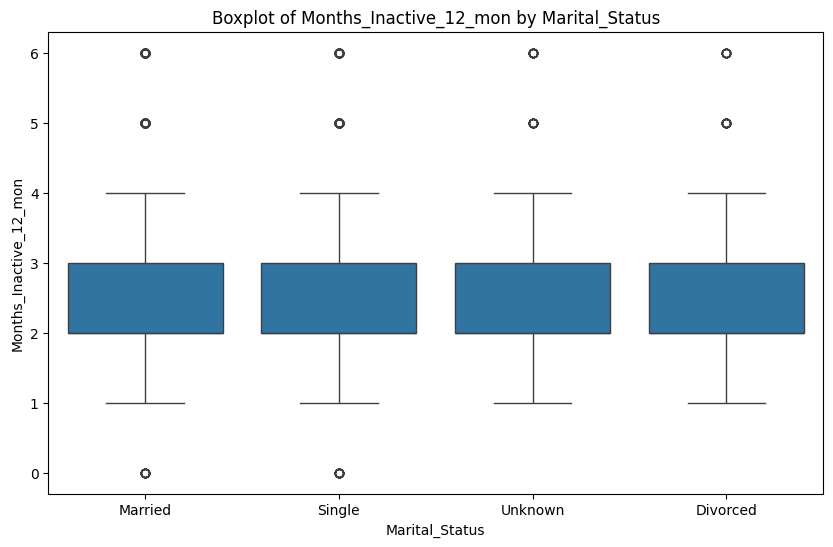

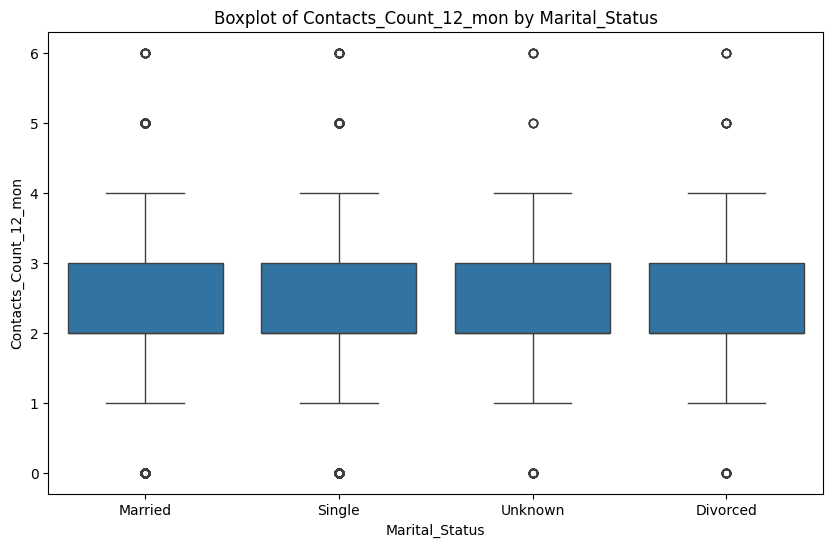

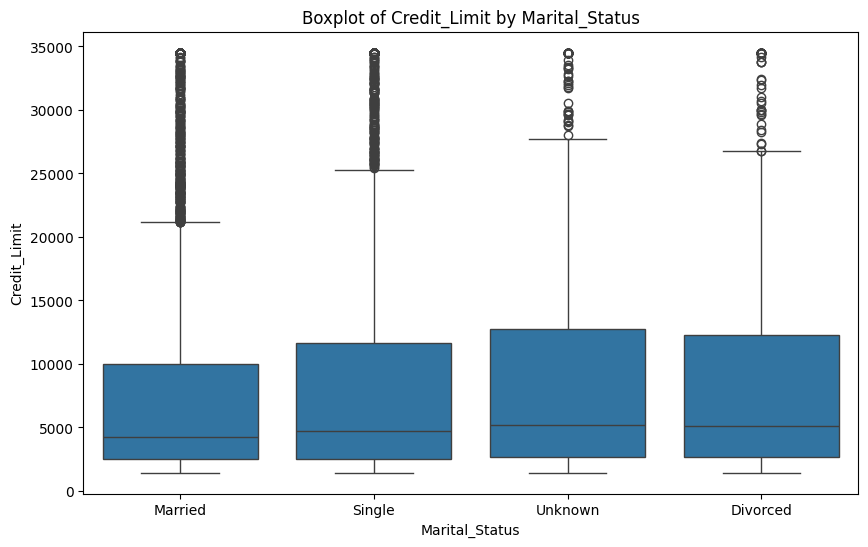

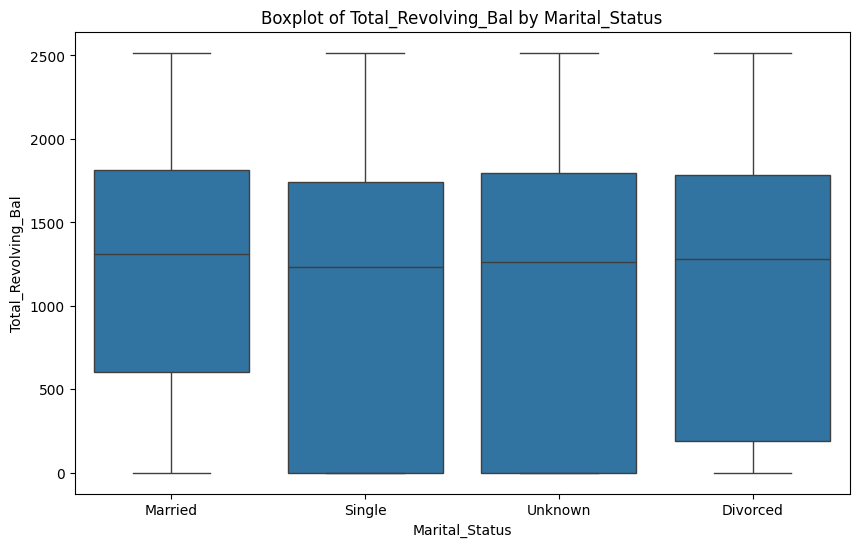

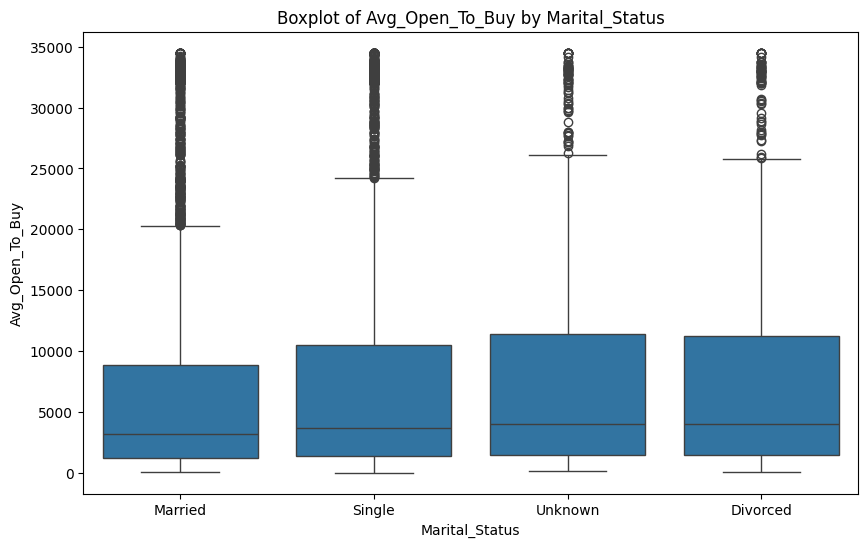

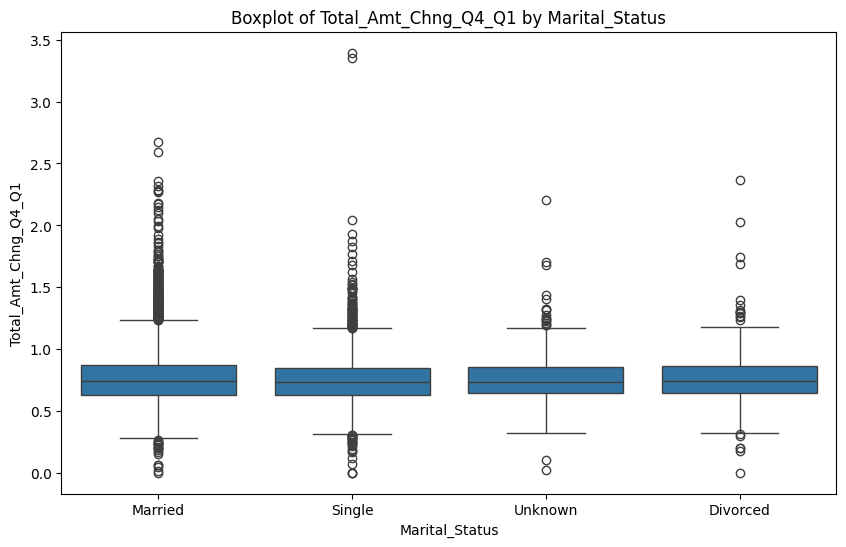

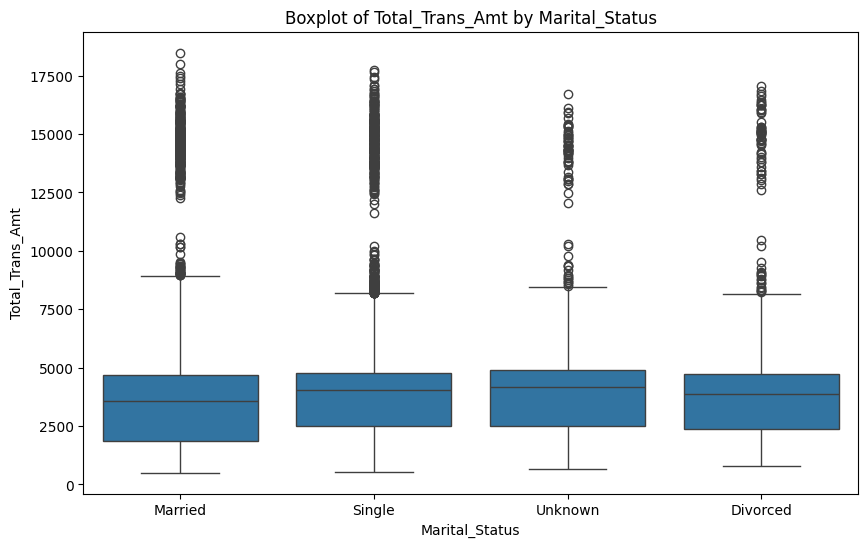

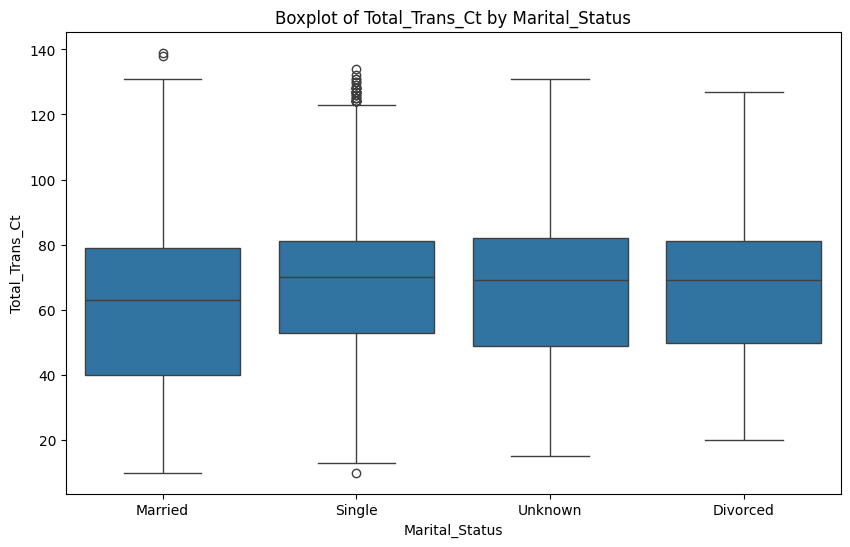

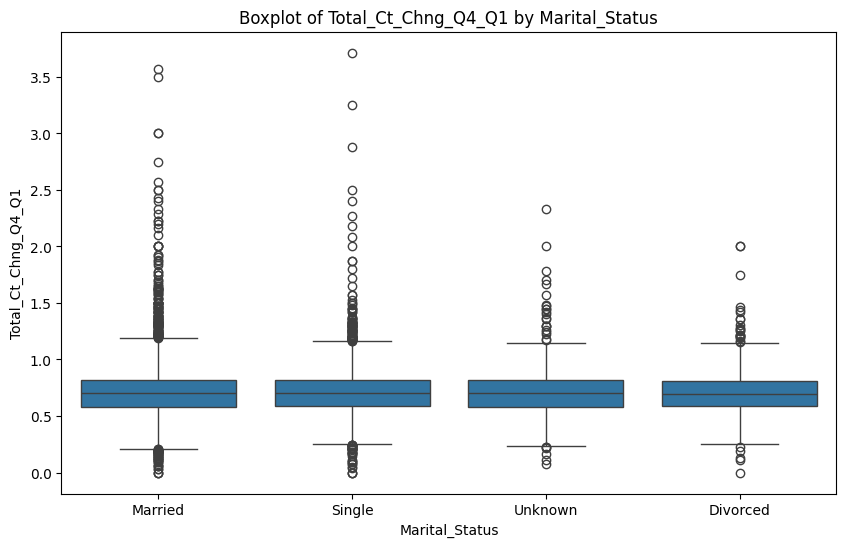

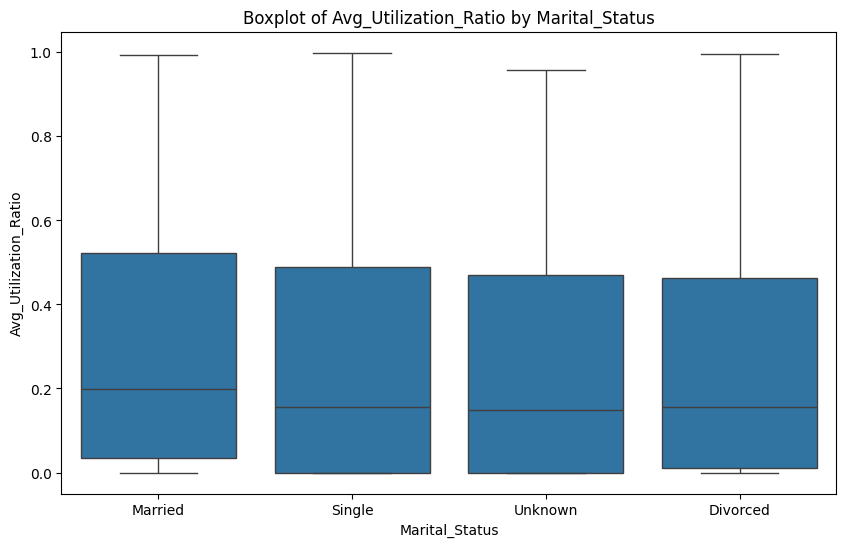

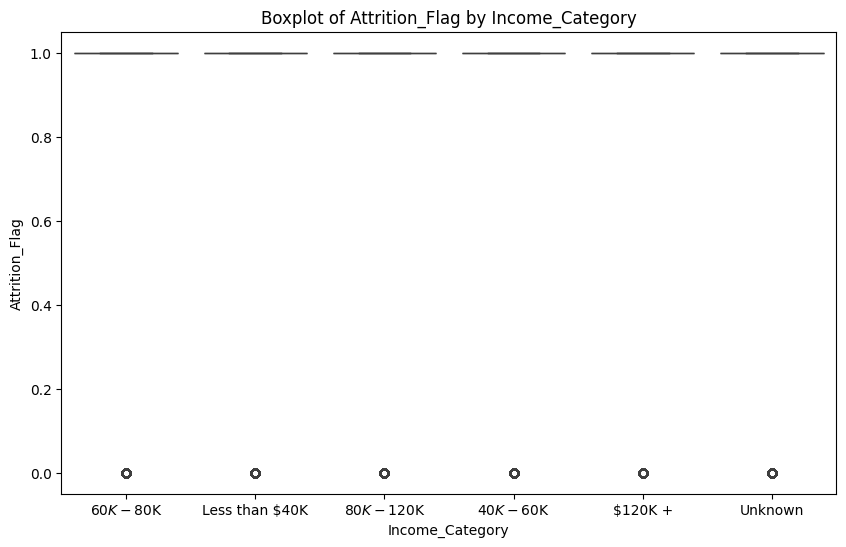

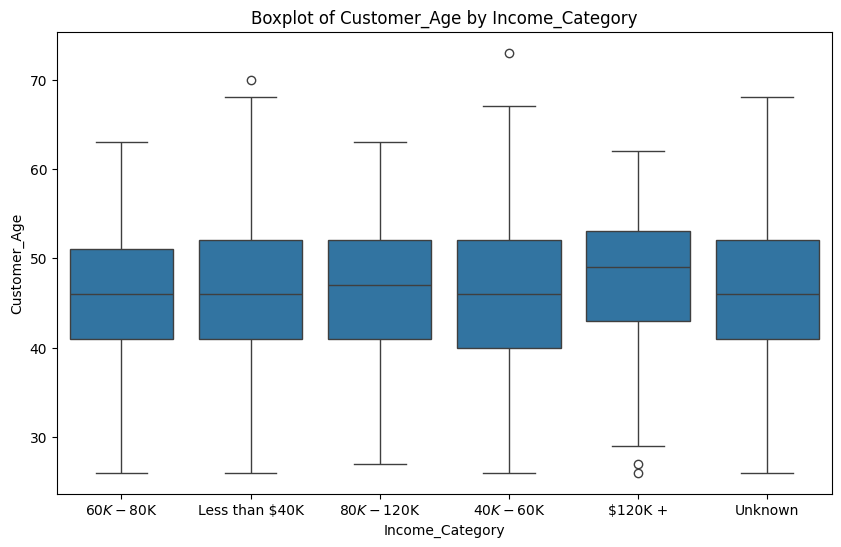

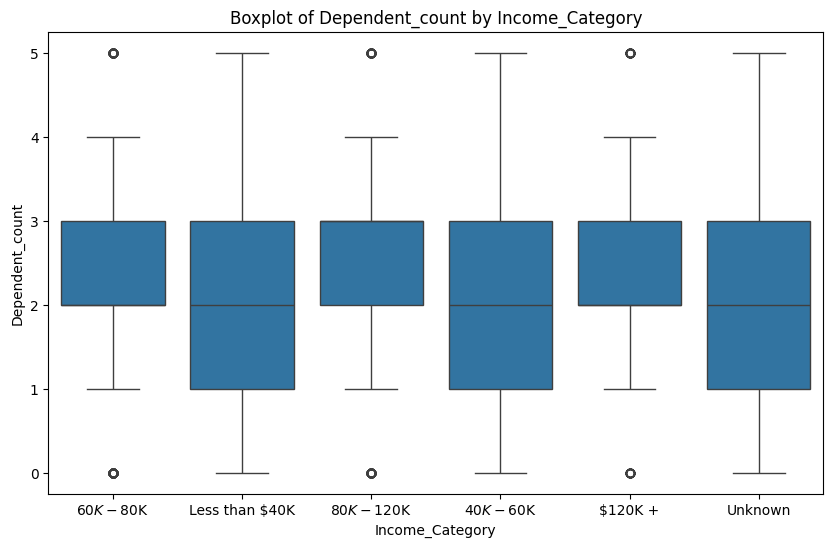

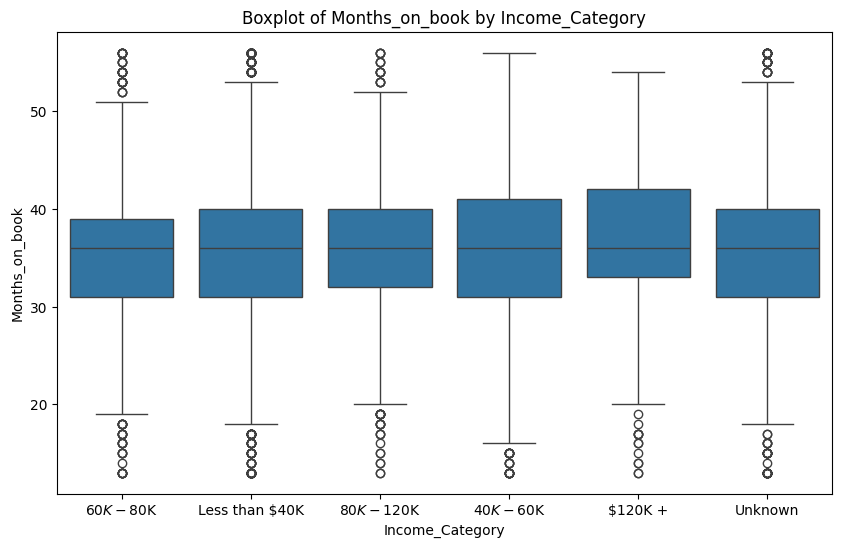

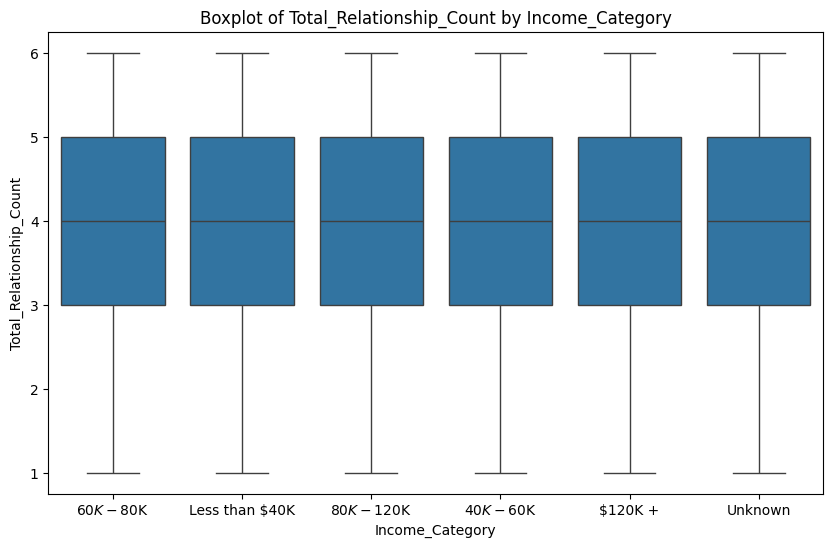

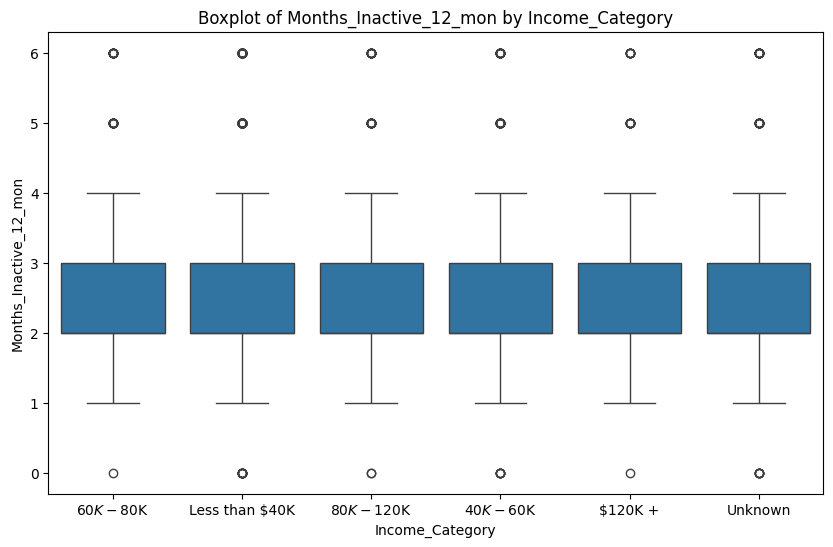

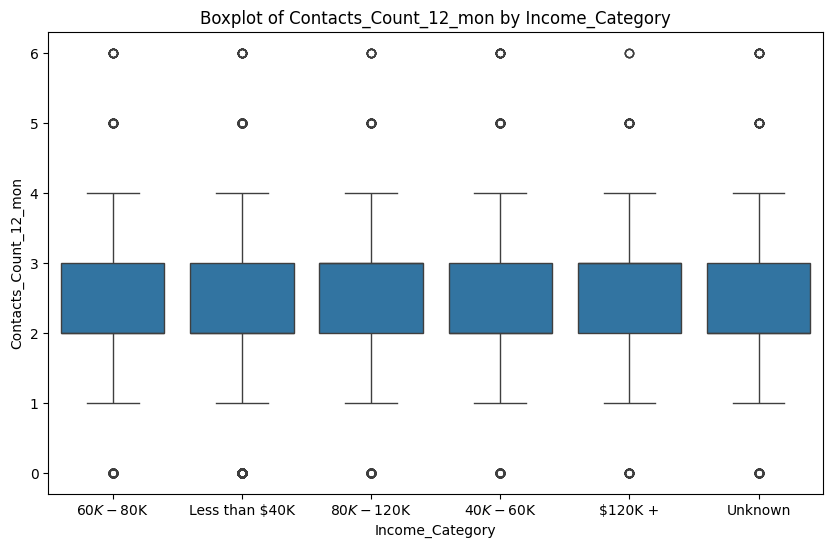

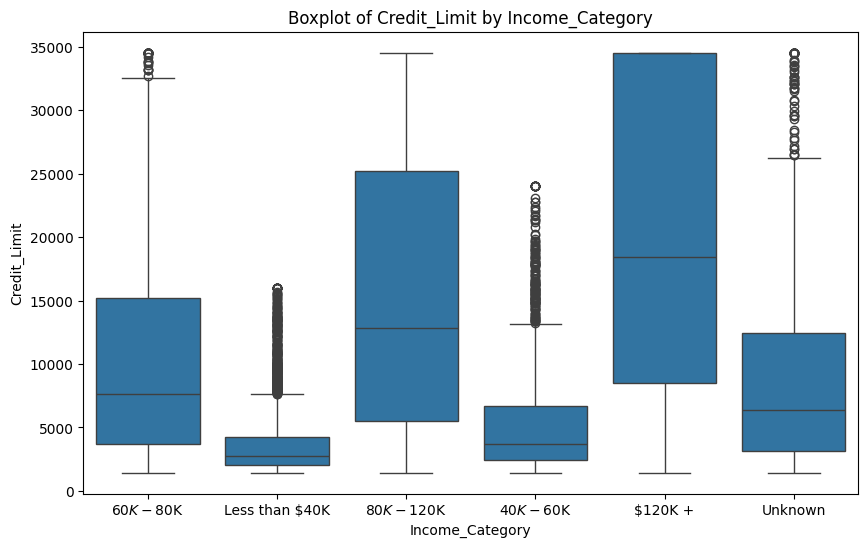

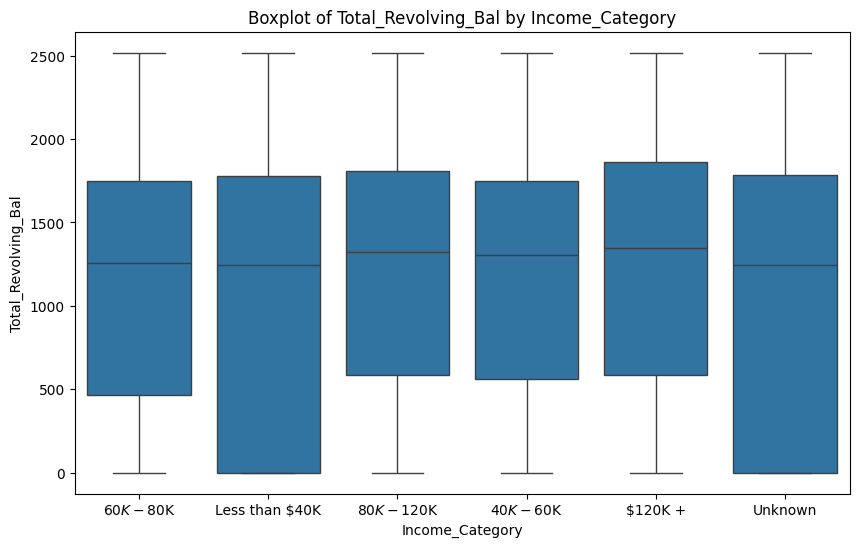

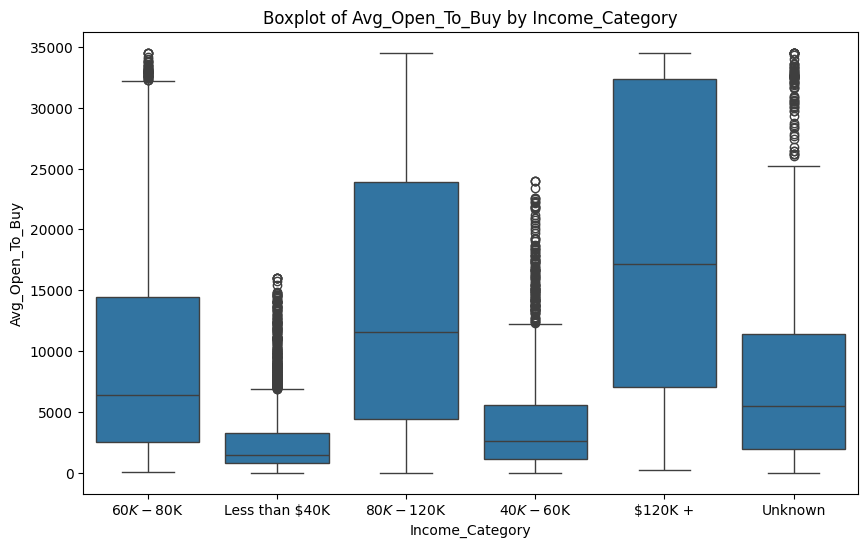

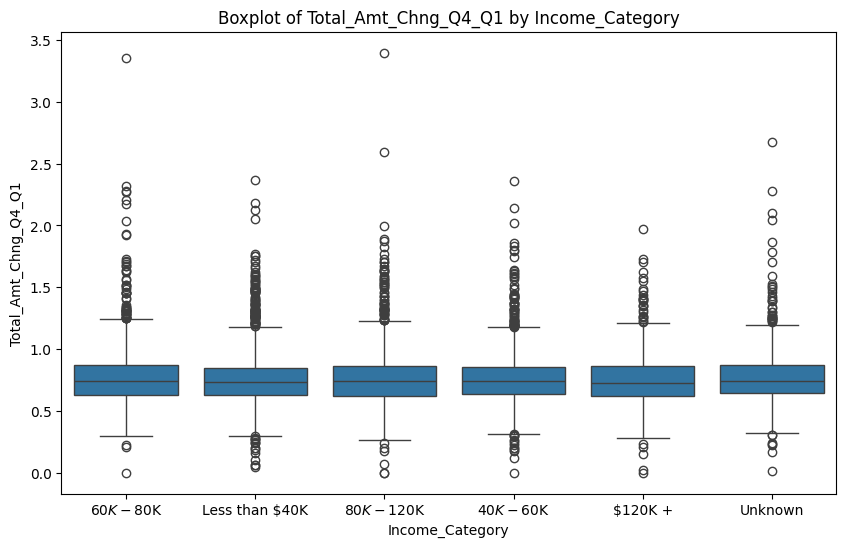

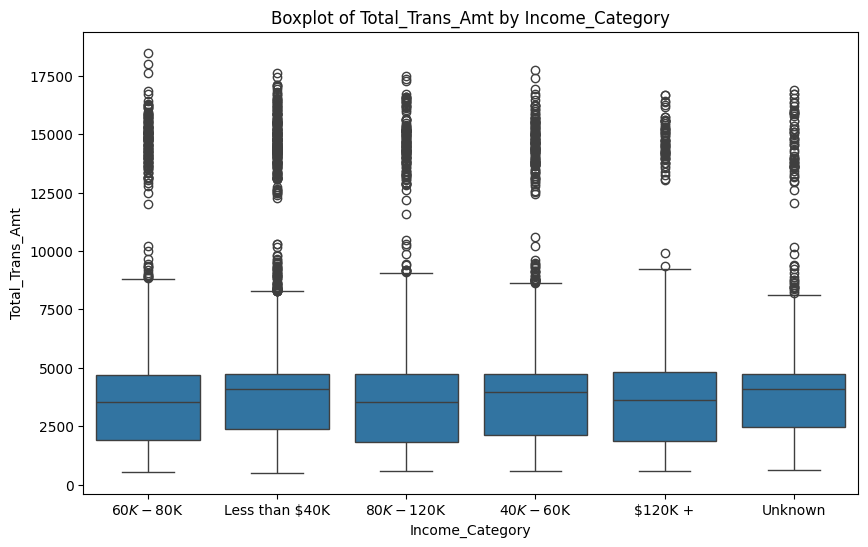

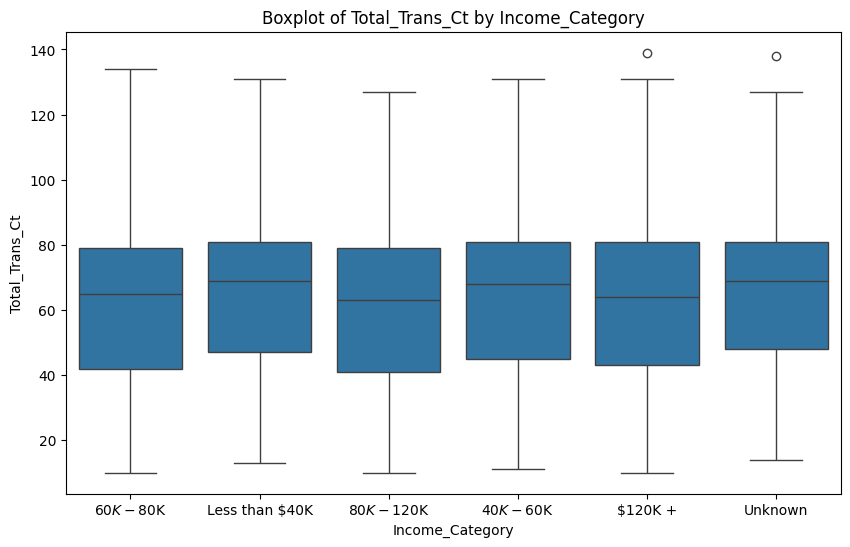

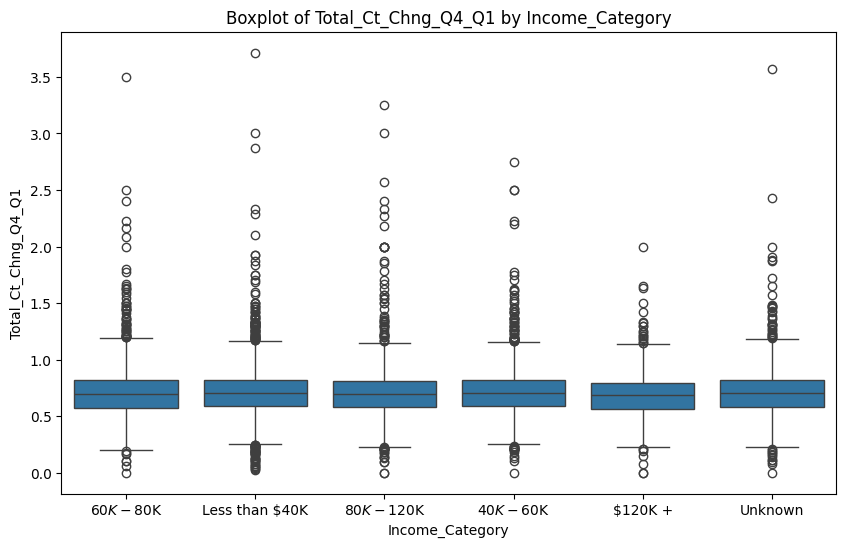

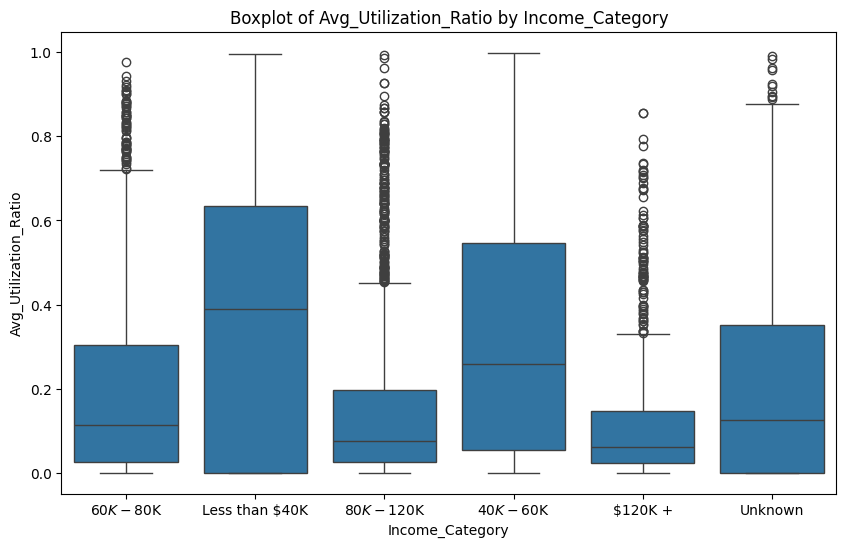

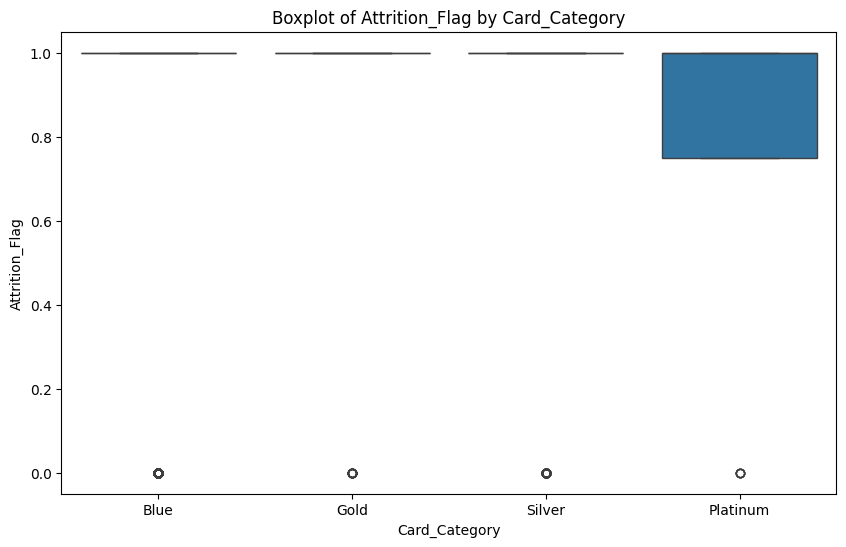

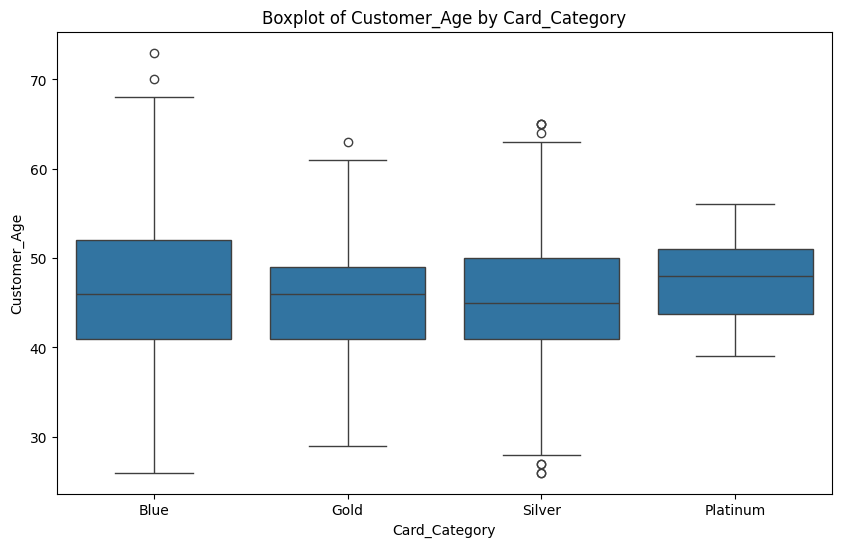

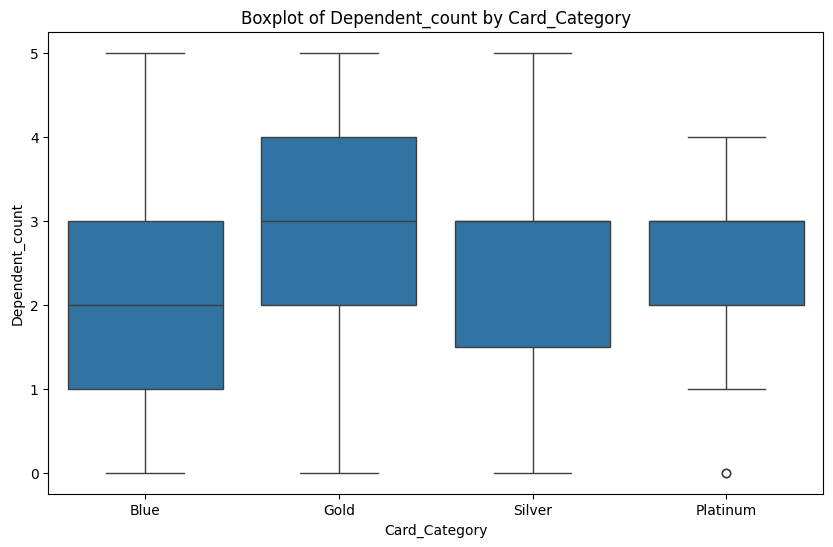

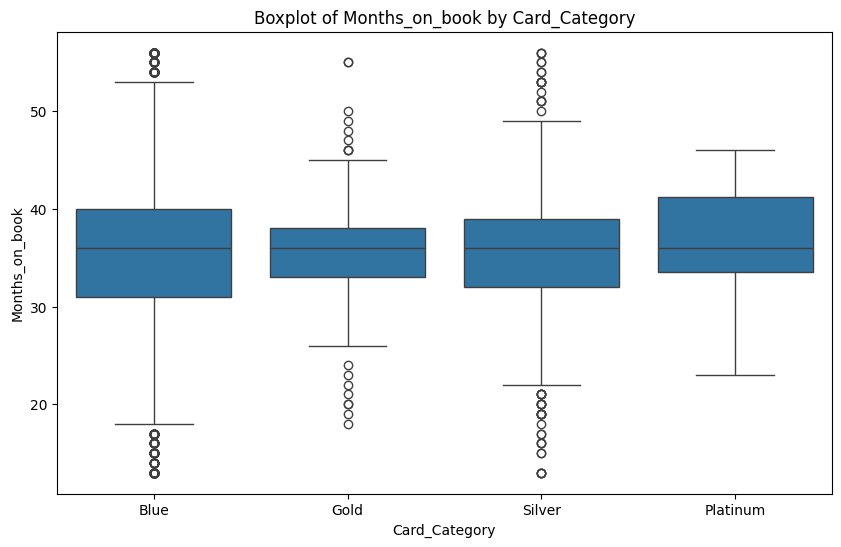

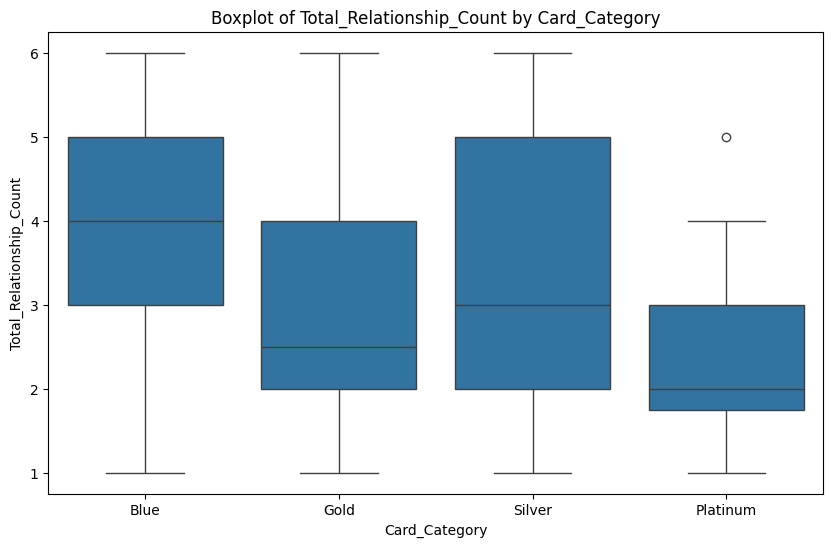

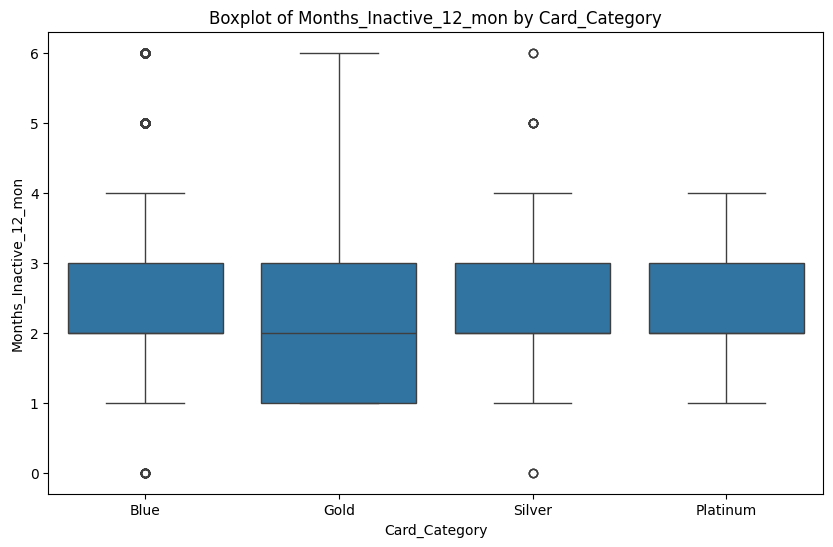

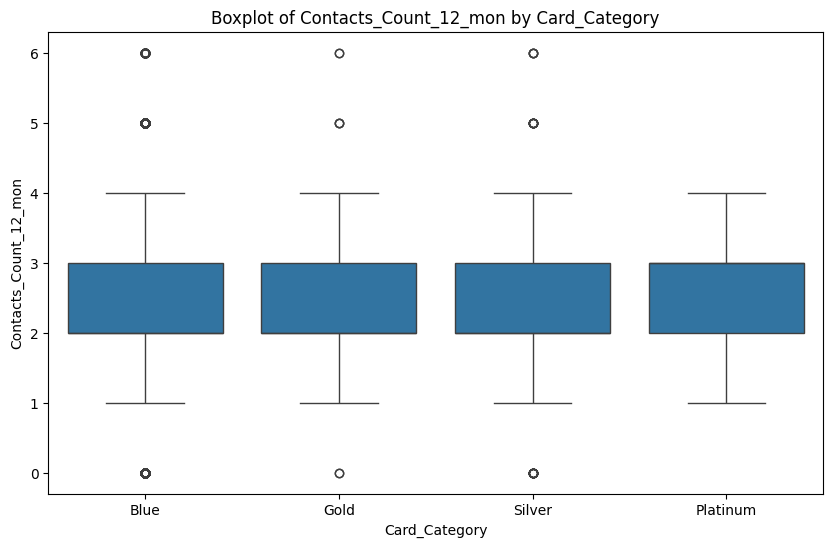

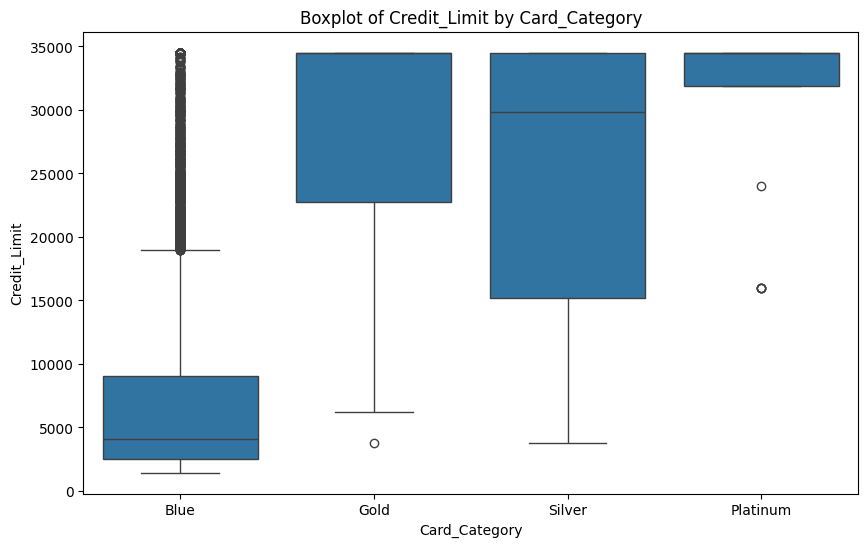

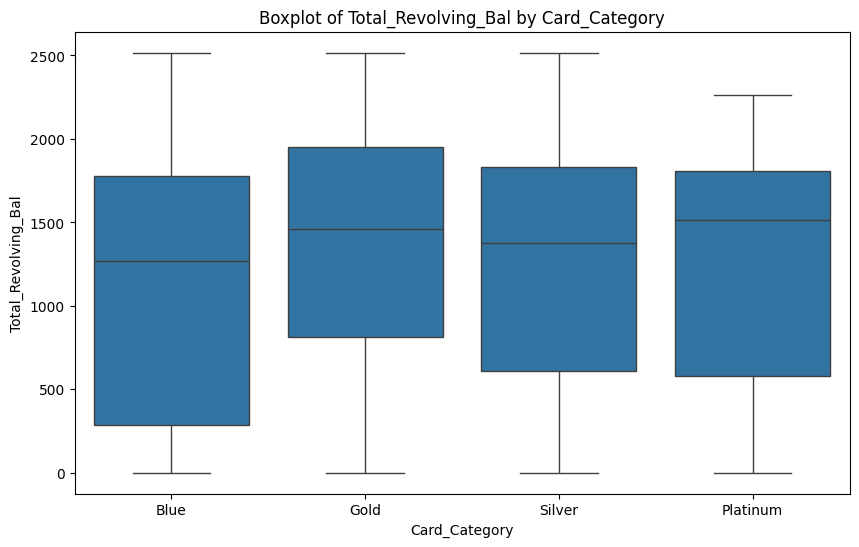

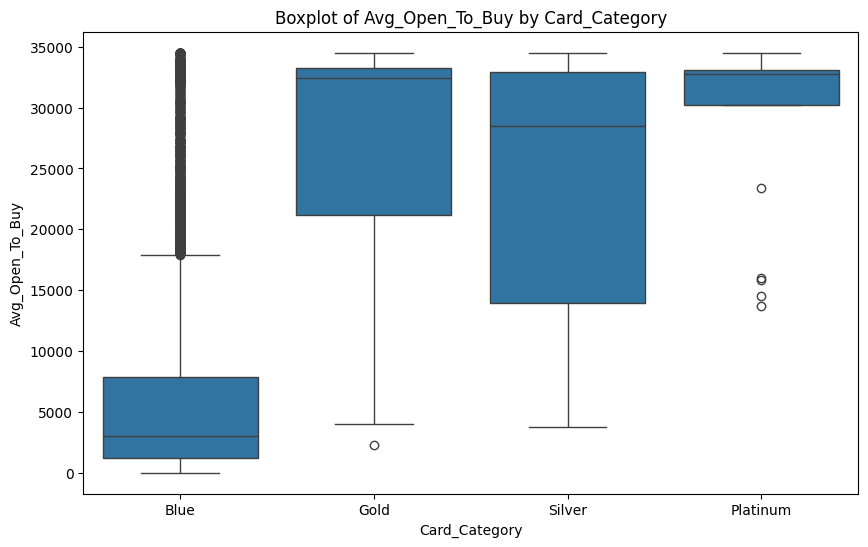

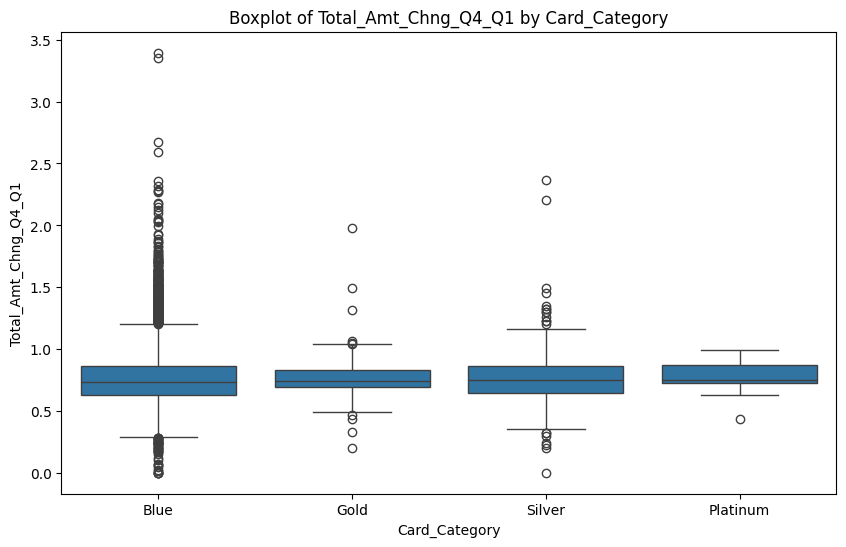

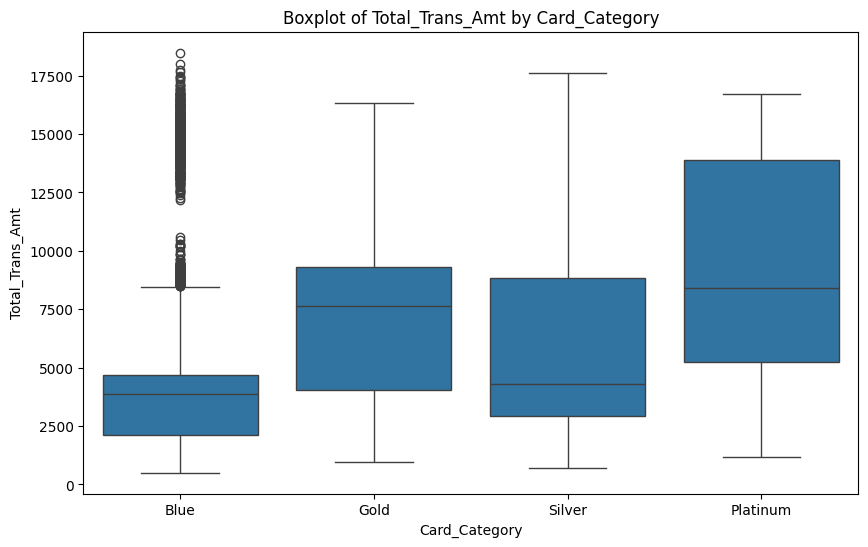

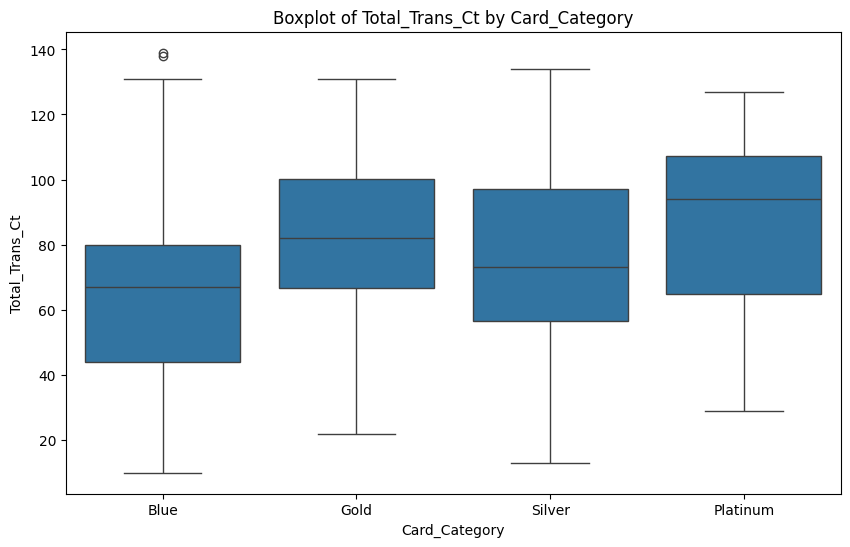

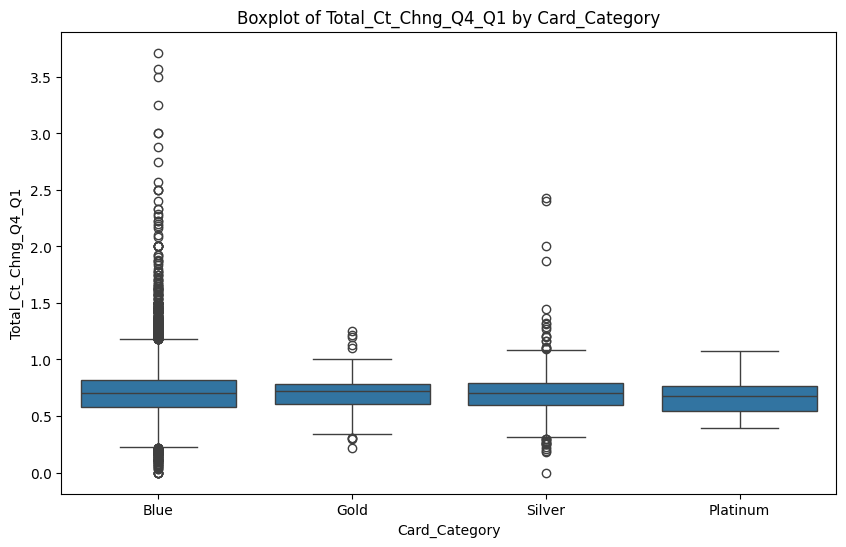

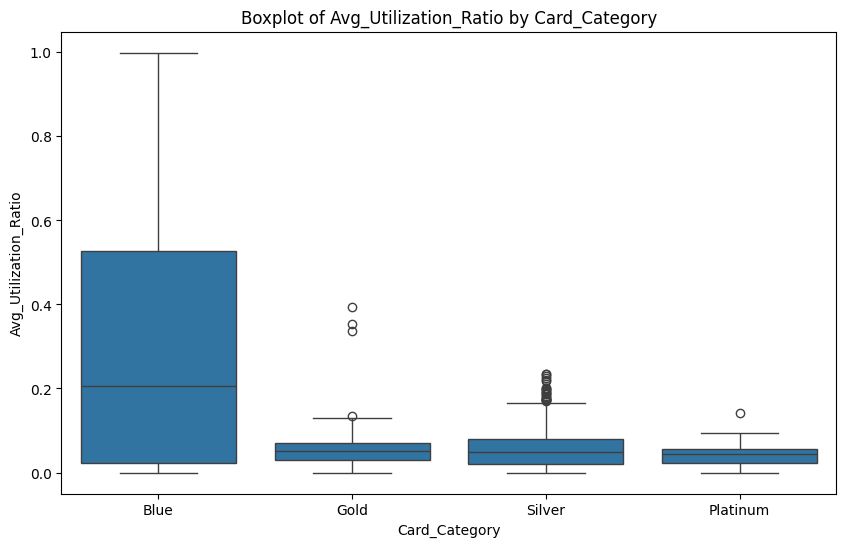

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot univariate plots for numerical columns
for column in numerical_columns:
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    # Histogram and KDE
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram and KDE of {column}')
    
    # Calculate percentages
    count, bins, _ = axes[0].hist(df[column].dropna(), bins=30, density=True, alpha=0.0)  # alpha=0 to hide the default hist
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    for count, x in zip(count, bin_centers):
        percent = f'{100 * count:.2f}%'
        axes[0].text(x, count, percent, ha='center', va='bottom', fontsize=8)
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

# Plot univariate plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    
    # Calculate percentages
    total = float(len(df[column]))
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

# Plot boxplots for numerical columns grouped by categorical columns
for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[cat_column], y=df[num_column])
        plt.title(f'Boxplot of {num_column} by {cat_column}')
        plt.show()


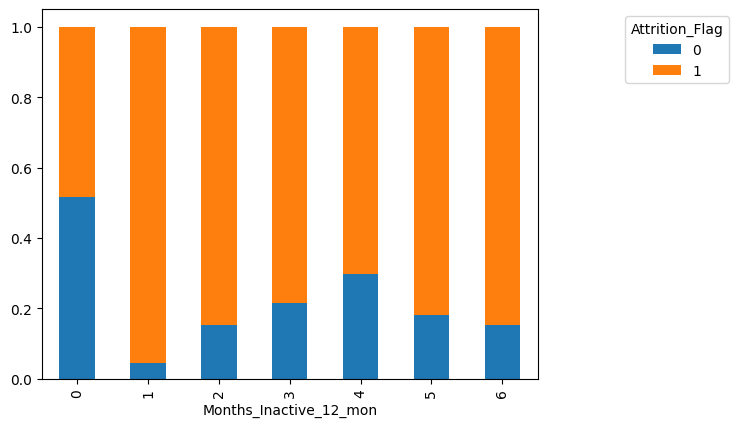

In [14]:
# Stacked bar plot
pd.crosstab(df['Months_Inactive_12_mon'], df['Attrition_Flag'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='Attrition_Flag', loc="upper right", bbox_to_anchor=(1.4, 1));

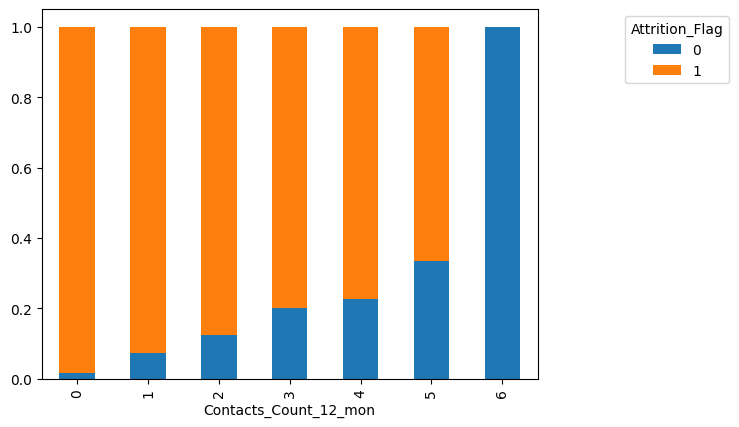

In [14]:
# Stacked bar plot
pd.crosstab(df['Contacts_Count_12_mon'], df['Attrition_Flag'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='Attrition_Flag', loc="upper right", bbox_to_anchor=(1.4, 1));

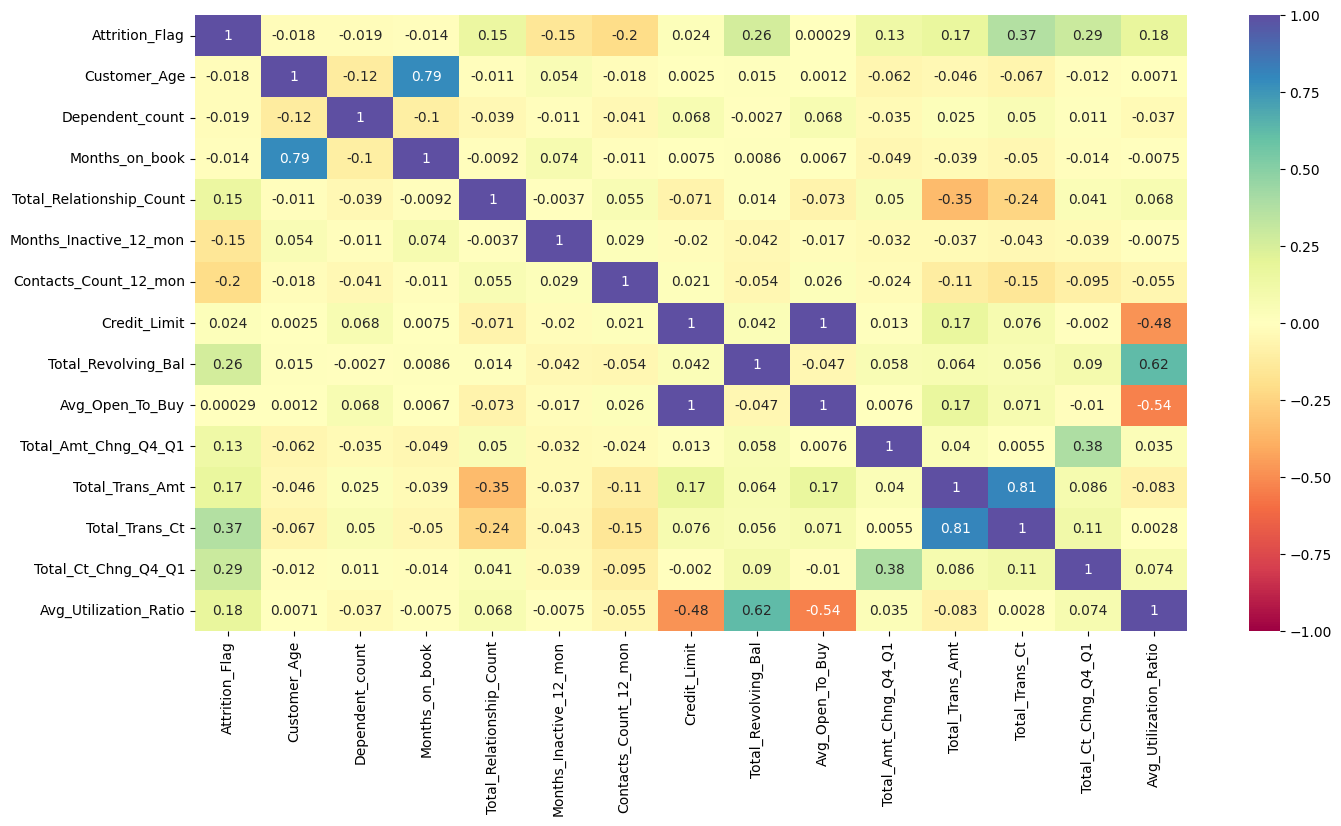

In [15]:
# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral");

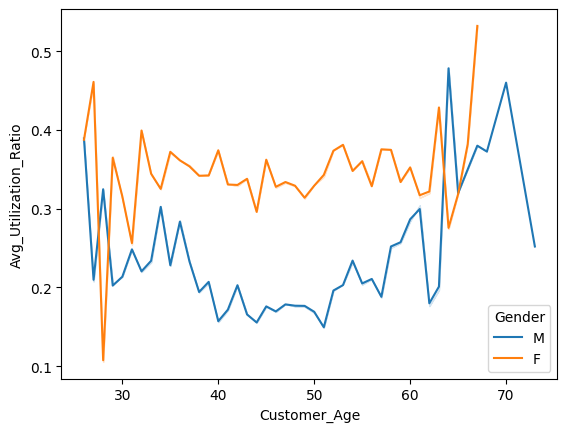

In [16]:
sns.lineplot(df, x='Customer_Age', y='Avg_Utilization_Ratio', hue='Gender', errorbar=('ci', 0))
plt.show()

# Data Prepration

In [18]:
def get_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

print('Percentage of Outliers')
print('`'*50)
for attr in df.select_dtypes(include=['int', 'float']):
    print(f'{attr}: {round(100 * get_outliers(df[attr]).shape[0] / df[attr].notnull().sum(), 2)}%')


Percentage of Outliers
``````````````````````````````````````````````````
Attrition_Flag: 16.07%
Customer_Age: 0.02%
Dependent_count: 0.0%
Months_on_book: 3.81%
Total_Relationship_Count: 0.0%
Months_Inactive_12_mon: 3.27%
Contacts_Count_12_mon: 6.21%
Credit_Limit: 9.72%
Total_Revolving_Bal: 0.0%
Avg_Open_To_Buy: 9.51%
Total_Amt_Chng_Q4_Q1: 3.91%
Total_Trans_Amt: 8.85%
Total_Trans_Ct: 0.02%
Total_Ct_Chng_Q4_Q1: 3.89%
Avg_Utilization_Ratio: 0.0%


In [18]:
# Seperating target and predictor variables
x = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

# 1) Random Forest Classifier Model

In [19]:
x=pd.get_dummies(x,drop_first=True).astype(int)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
# Predict the test data

In [22]:
y_pred=rf.predict(x_test)

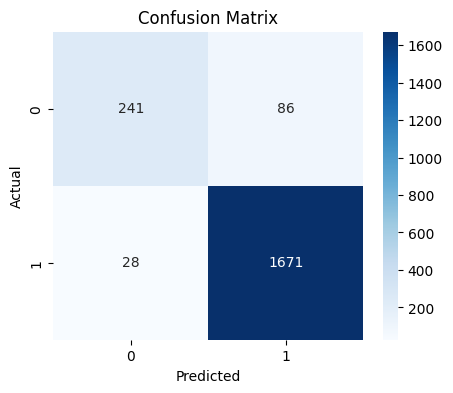

In [23]:
# Assume you have true labels stored in y_test
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       327
           1       0.95      0.98      0.97      1699

    accuracy                           0.94      2026
   macro avg       0.92      0.86      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [25]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

np.float64(0.8602613877924232)

 # Random Forest Classifier has 86% accuracy

# 2)  Logistic Regression Model

In [26]:
logistic=LogisticRegression()

### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[1,2,5,10,20],'max_iter':[100,200]}

In [29]:
logistic_cv=GridSearchCV(logistic,param_grid=parameters,scoring='accuracy',cv=5)
logistic_cv.fit(x_train,y_train)

c:\Users\ROHIT VERMA\OneDrive\Desktop\D2K_PROJECTS\D2K_PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ROHIT VERMA\OneDrive\Desktop\D2K_PROJECTS\D2K_PROJECT\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 10, 20], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

#### Best Parameters

In [30]:
logistic_cv.best_params_,logistic_cv.best_score_

({'C': 2, 'max_iter': 200, 'penalty': 'l2'}, np.float64(0.8908782111331979))

### Predict Test Data

In [31]:
log_pred=logistic_cv.predict(x_test)

In [32]:
accuracy_score(log_pred,y_test)

0.8840078973346496

# Logistic Regression Classifier has 88% accuracy

# K Means Clustering

In [33]:
importances = rf.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select top 5 features
top_features = feature_importance_df['feature'].head(5).values
print("Top 5 features:", top_features)

Top 5 features: ['Total_Trans_Amt' 'Total_Trans_Ct' 'Total_Revolving_Bal'
 'Total_Relationship_Count' 'Credit_Limit']


In [34]:
df_top_features = df[top_features]
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total_Trans_Amt           10127 non-null  int64  
 1   Total_Trans_Ct            10127 non-null  int64  
 2   Total_Revolving_Bal       10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Credit_Limit              10127 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 395.7 KB


In [35]:
scaler = StandardScaler()
df_top_features_scaled = scaler.fit_transform(df_top_features)

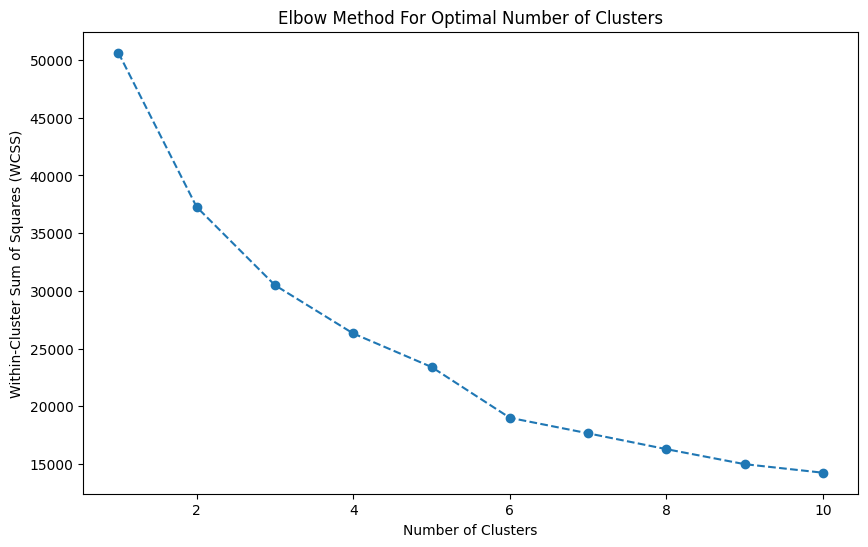

In [36]:
cluster_range = range(1, 11)
wcss = []
from sklearn.cluster import KMeans

# Calculate WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_top_features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Create the dendrogram

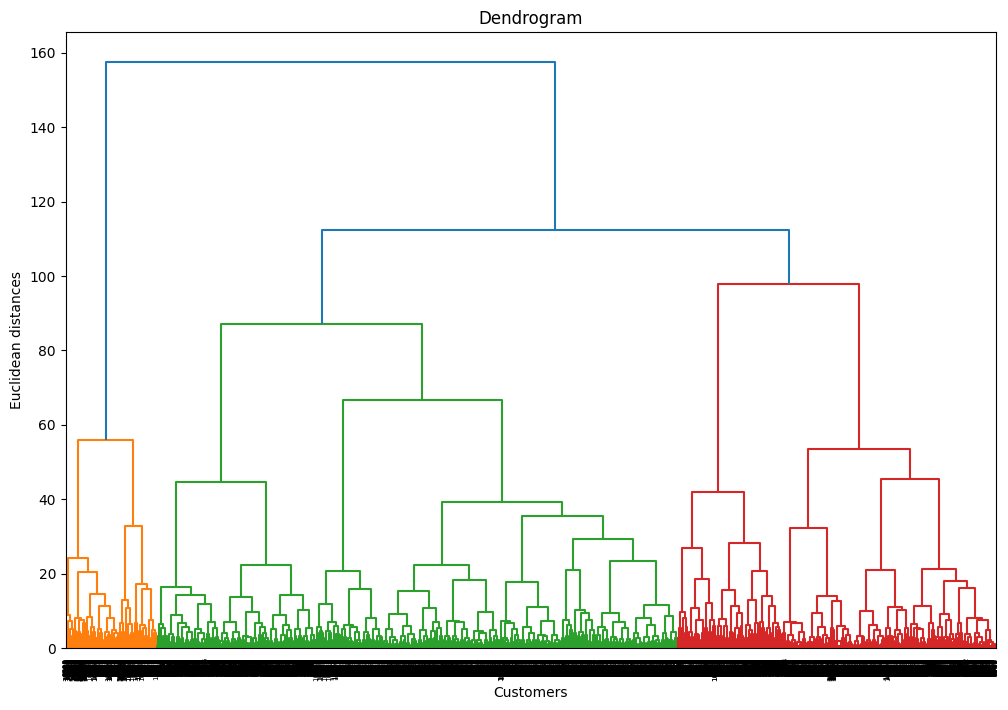

In [59]:
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_top_features_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Optimal value for clustering is 3

In [37]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(df_top_features_scaled)
pred_km = k_means.labels_
data_km = pd.concat([df_top_features, pd.DataFrame({"cluster":pred_km})], axis=1)
data_km.head()

Total_Trans_Amt  Total_Trans_Ct  Total_Revolving_Bal  \
0             1144              42                  777   
1             1291              33                  864   
2             1887              20                    0   
3             1171              20                 2517   
4              816              28                    0   

   Total_Relationship_Count  Credit_Limit  cluster  
0                         5       12691.0        2  
1                         6        8256.0        2  
2                         4        3418.0        0  
3                         3        3313.0        2  
4                         5        4716.0        0

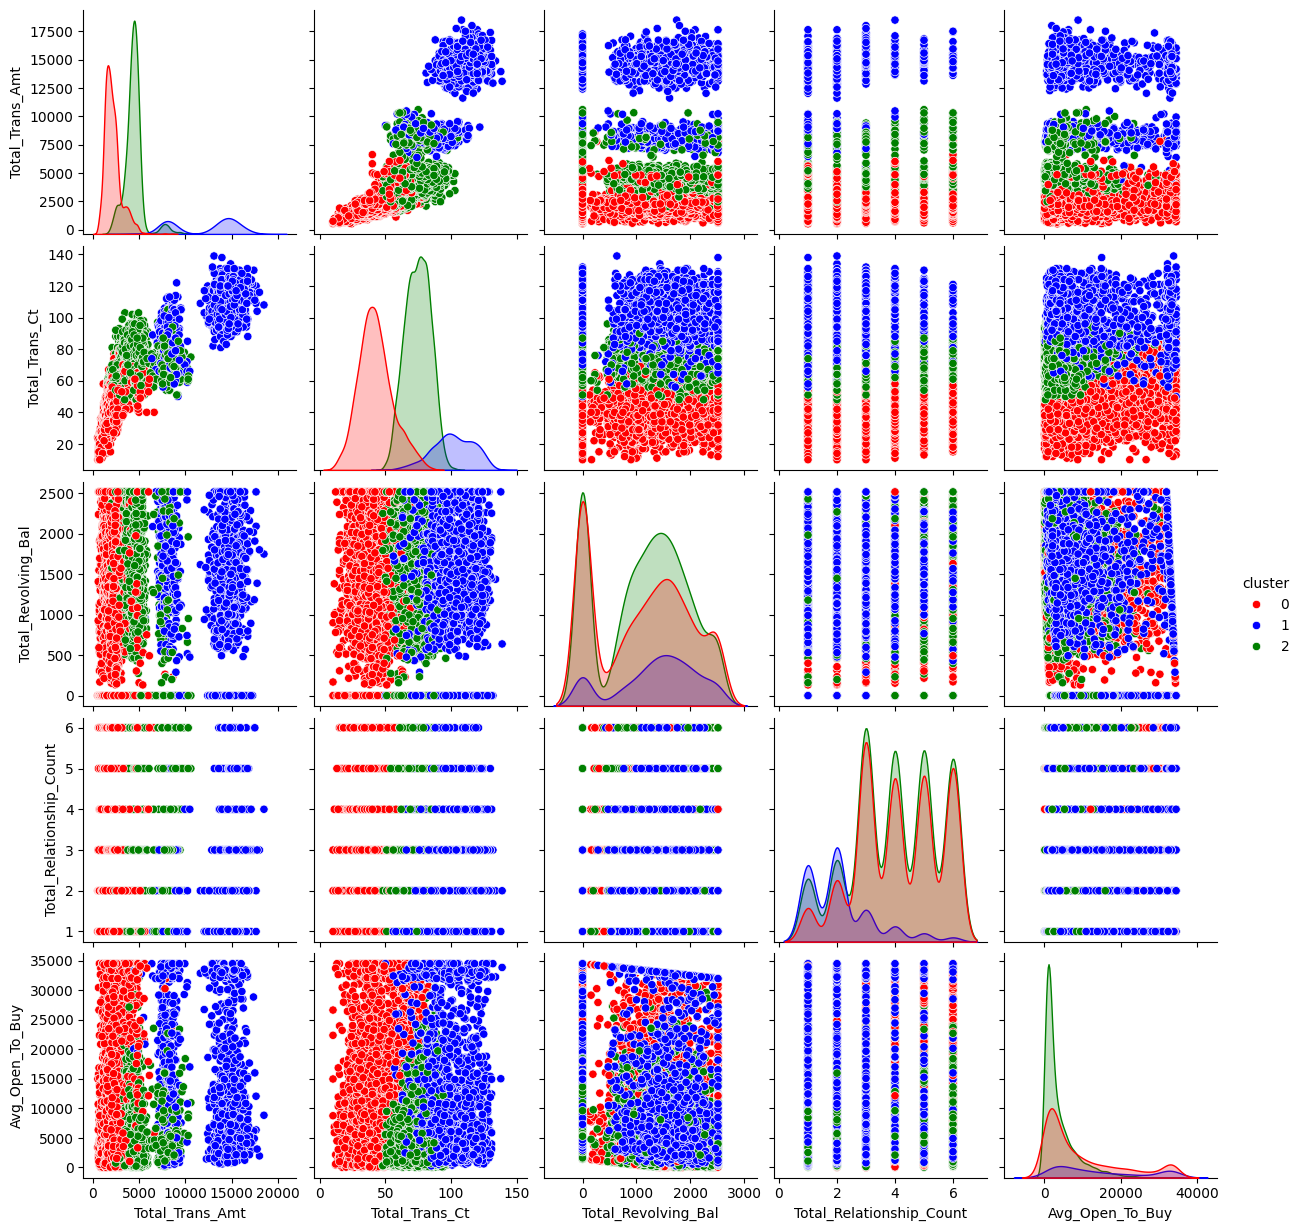

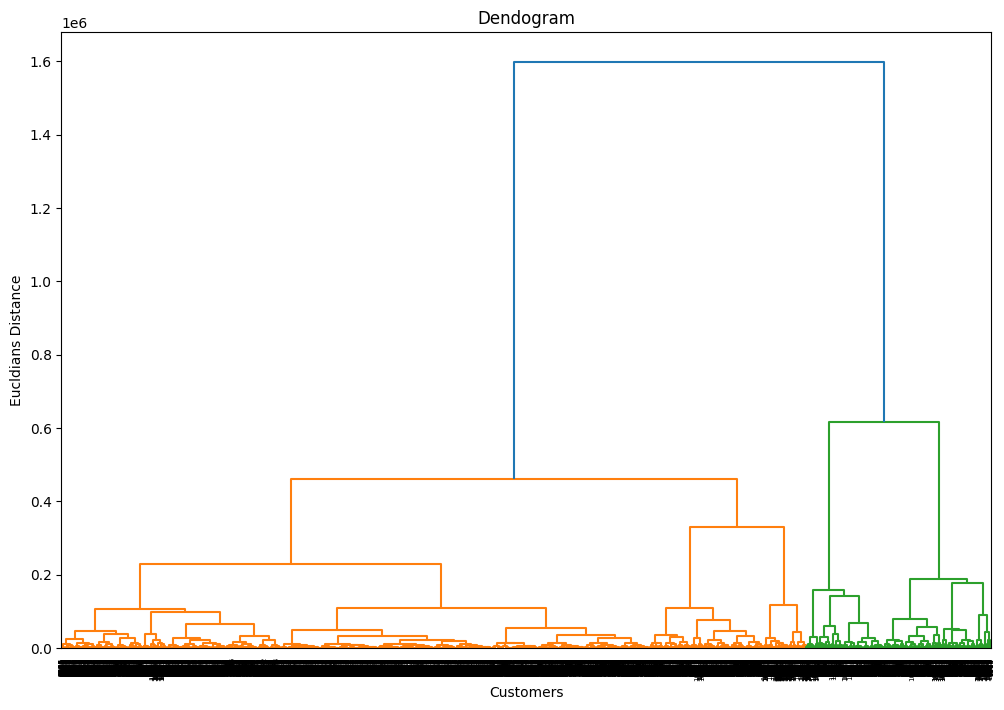

In [62]:
sns.pairplot(data_km, hue='cluster', palette = ["red","blue","green"])
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucldians Distance')
plt.show()

# Pickling the model for deployment

In [38]:
pickle.dump(logistic_cv,open('logistic.pkl','wb'))

In [39]:
logistic_pickle_model=pickle.load(open('logistic.pkl','rb'))